In [1]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
from datlib.FRED import *
from datlib.plots import *

# all data in $ billions
data_codes  = {"Currency in Circulation": "WCURCIR",
               "GDP": "GDP",
               "Real GDP": "GDPC1"}
start = datetime.datetime(1975, 1, 1)
end = datetime.datetime.today()
data = gather_data(data_codes = data_codes, 
                   start = start, 
                   end = end, 
                   freq = "Q")

In [2]:
data

,Currency in Circulation,GDP,Real GDP
DATE,,,
1984-03-31,168.290462,3908.054,7488.167
1984-06-30,172.464308,4009.601,7617.547
1984-09-30,176.321385,4084.250,7690.985
1984-12-31,178.572923,4148.551,7754.117
1985-03-31,179.415308,4230.168,7829.260
...,...,...,...
2021-03-31,2103.954692,22038.226,19055.655
2021-06-30,2168.094538,22740.959,19368.310
2021-09-30,2189.947538,23202.344,19478.893


In [3]:
# V = Py / M
data["Velocity"] = data["GDP"].div(data["Currency in Circulation"])
# k = 1 / v
data["Portfolio Demand"] = data["Velocity"].pow(-1)
# P = Py / y
data["GDP Deflator"] = data["GDP"].div(data["Real GDP"])
# Real Cash Balances = M / P
# M / P = yk
data["Real Currency in Circulation"] = data["Currency in Circulation"].div(data["GDP Deflator"])

In [5]:
data.dropna()

,Currency in Circulation,GDP,Real GDP,Velocity,Portfolio Demand,GDP Deflator,Real Currency in Circulation
DATE,,,,,,,
1984-03-31,168.290462,3908.054,7488.167,23.222077,0.043062,0.521897,322.458973
1984-06-30,172.464308,4009.601,7617.547,23.248874,0.043013,0.526364,327.652295
1984-09-30,176.321385,4084.250,7690.985,23.163668,0.043171,0.531044,332.027943
1984-12-31,178.572923,4148.551,7754.117,23.231691,0.043045,0.535013,333.773247
1985-03-31,179.415308,4230.168,7829.260,23.577520,0.042413,0.540302,332.064611
...,...,...,...,...,...,...,...
2020-12-31,2056.613077,21477.597,18767.778,10.443188,0.095756,1.144387,1797.131106
2021-03-31,2103.954692,22038.226,19055.655,10.474668,0.095468,1.156519,1819.213341
2021-06-30,2168.094538,22740.959,19368.310,10.488915,0.095339,1.174132,1846.550408


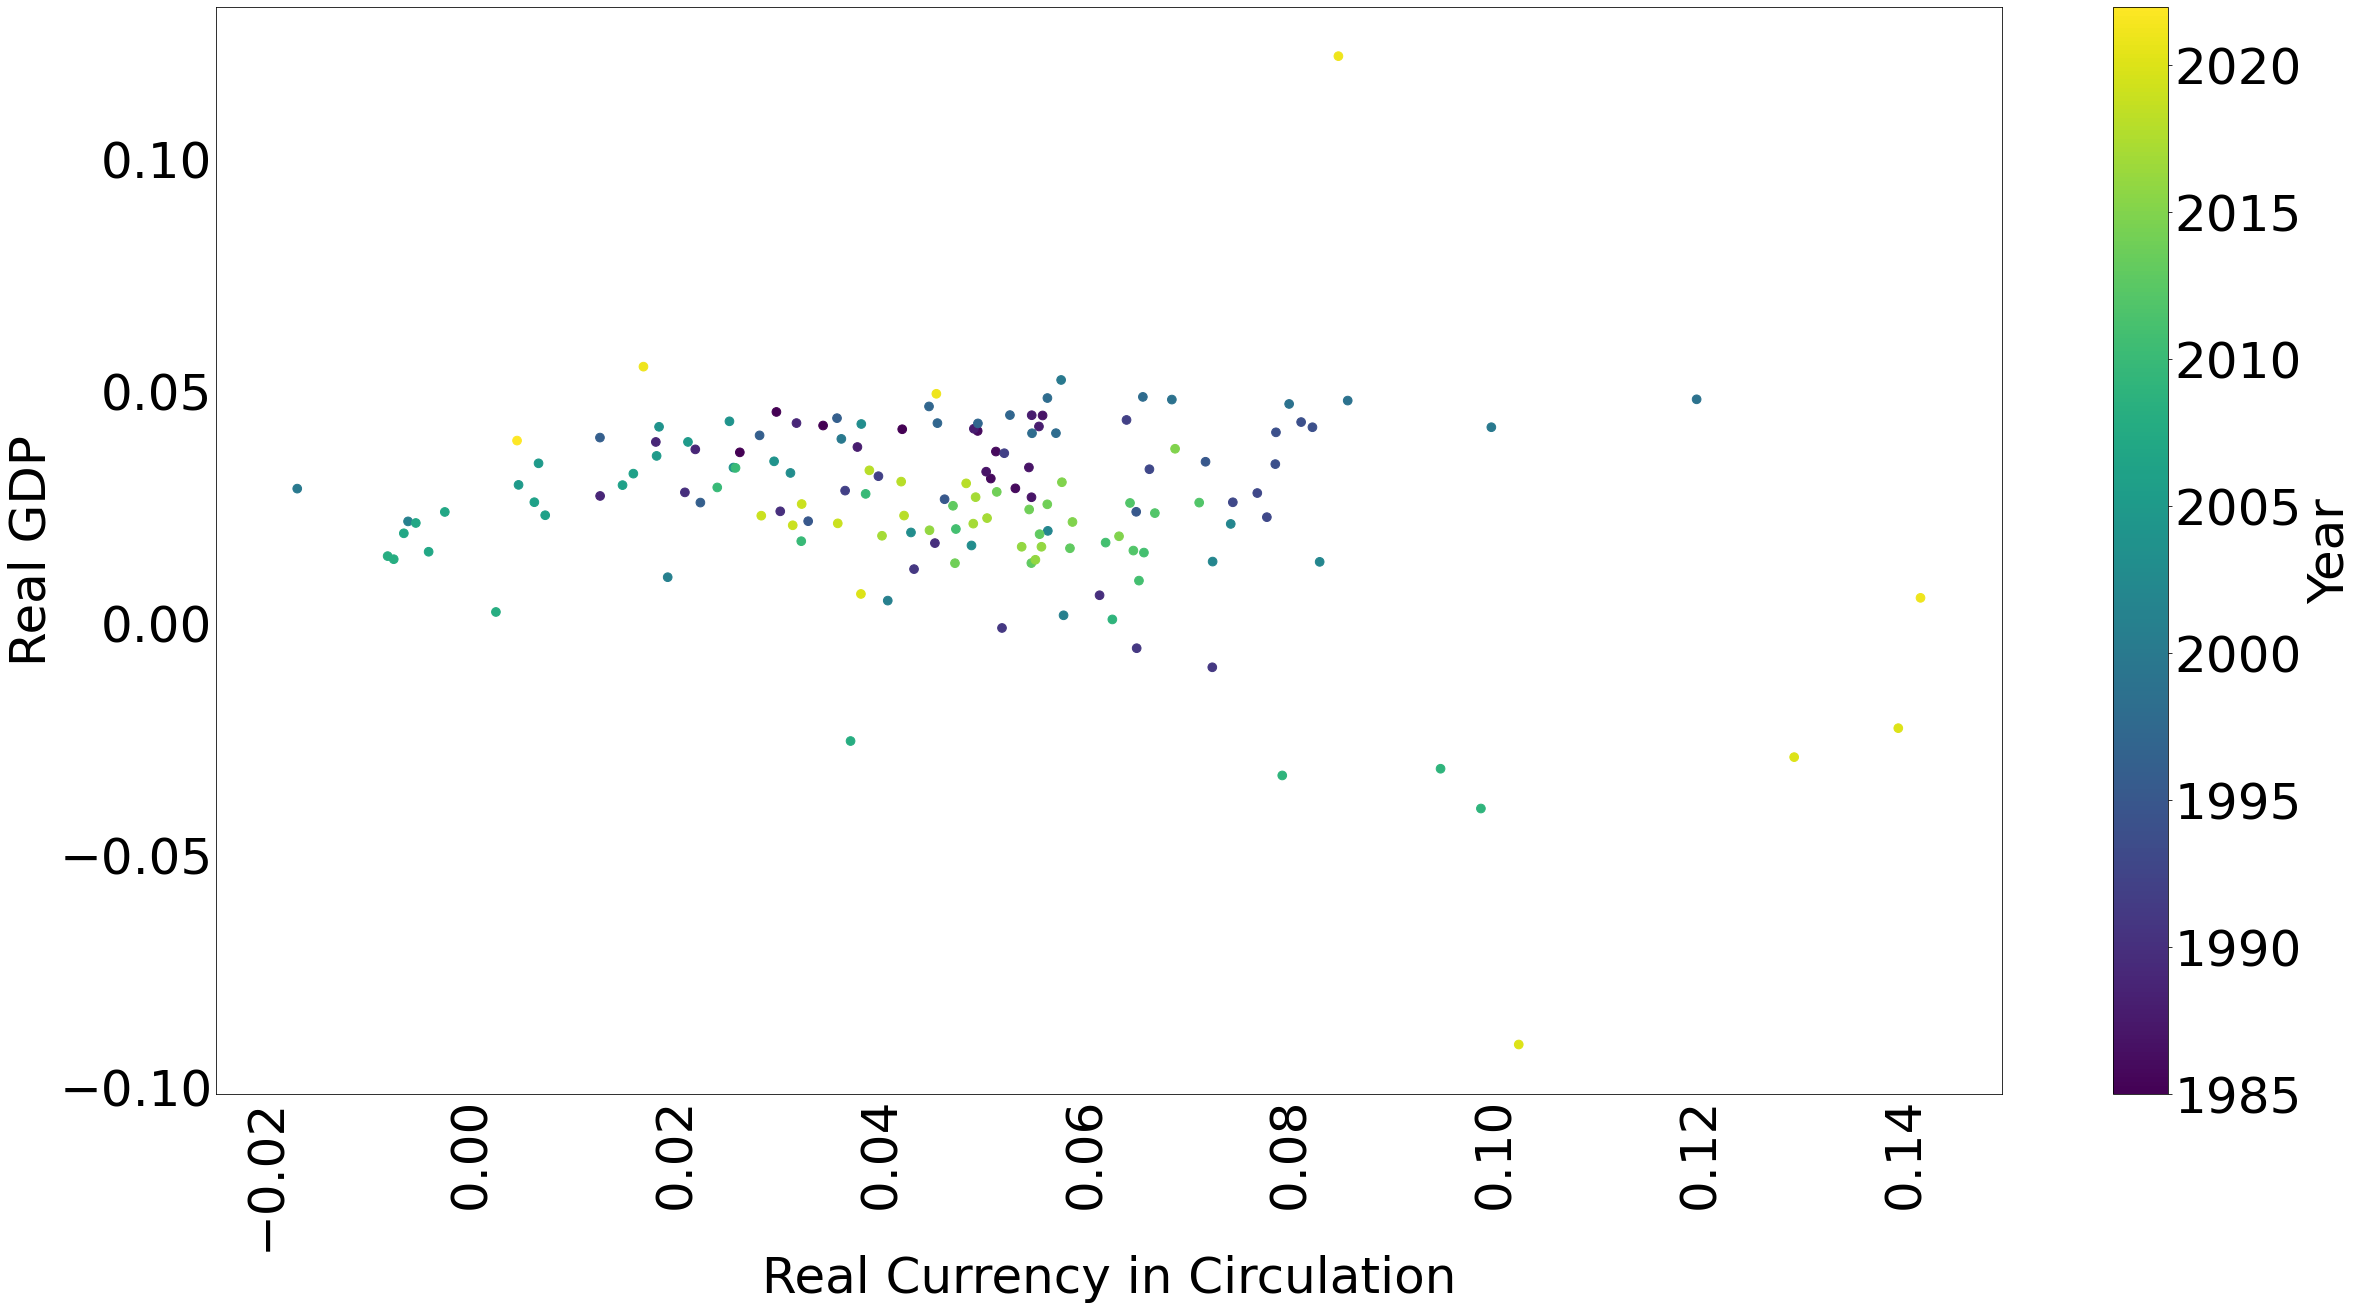

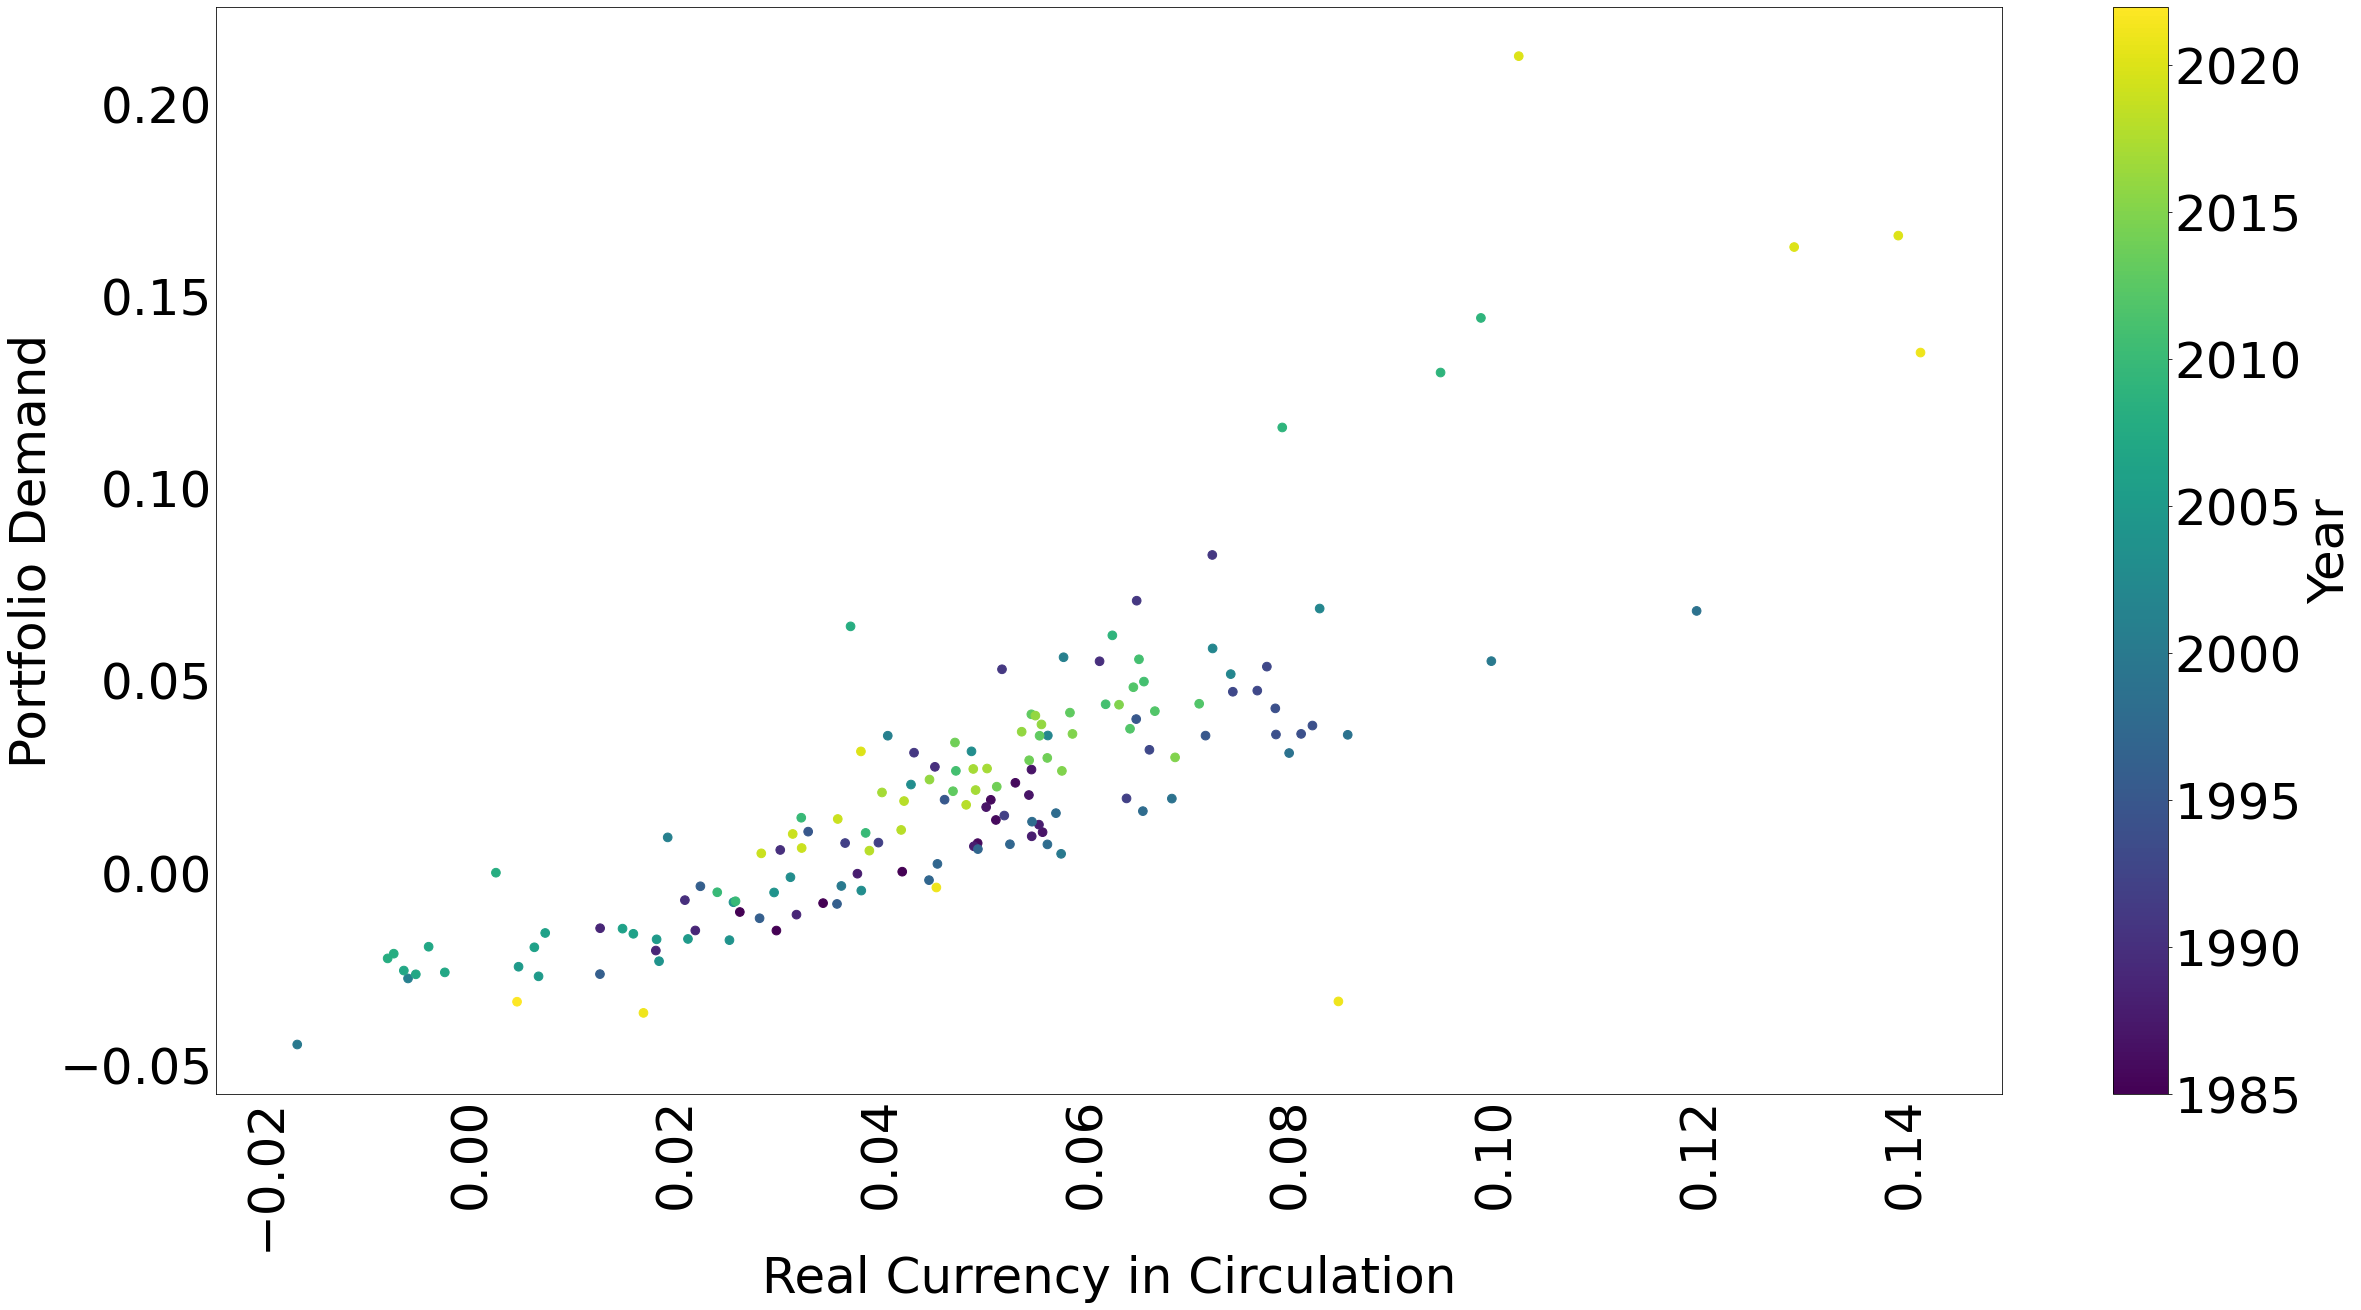

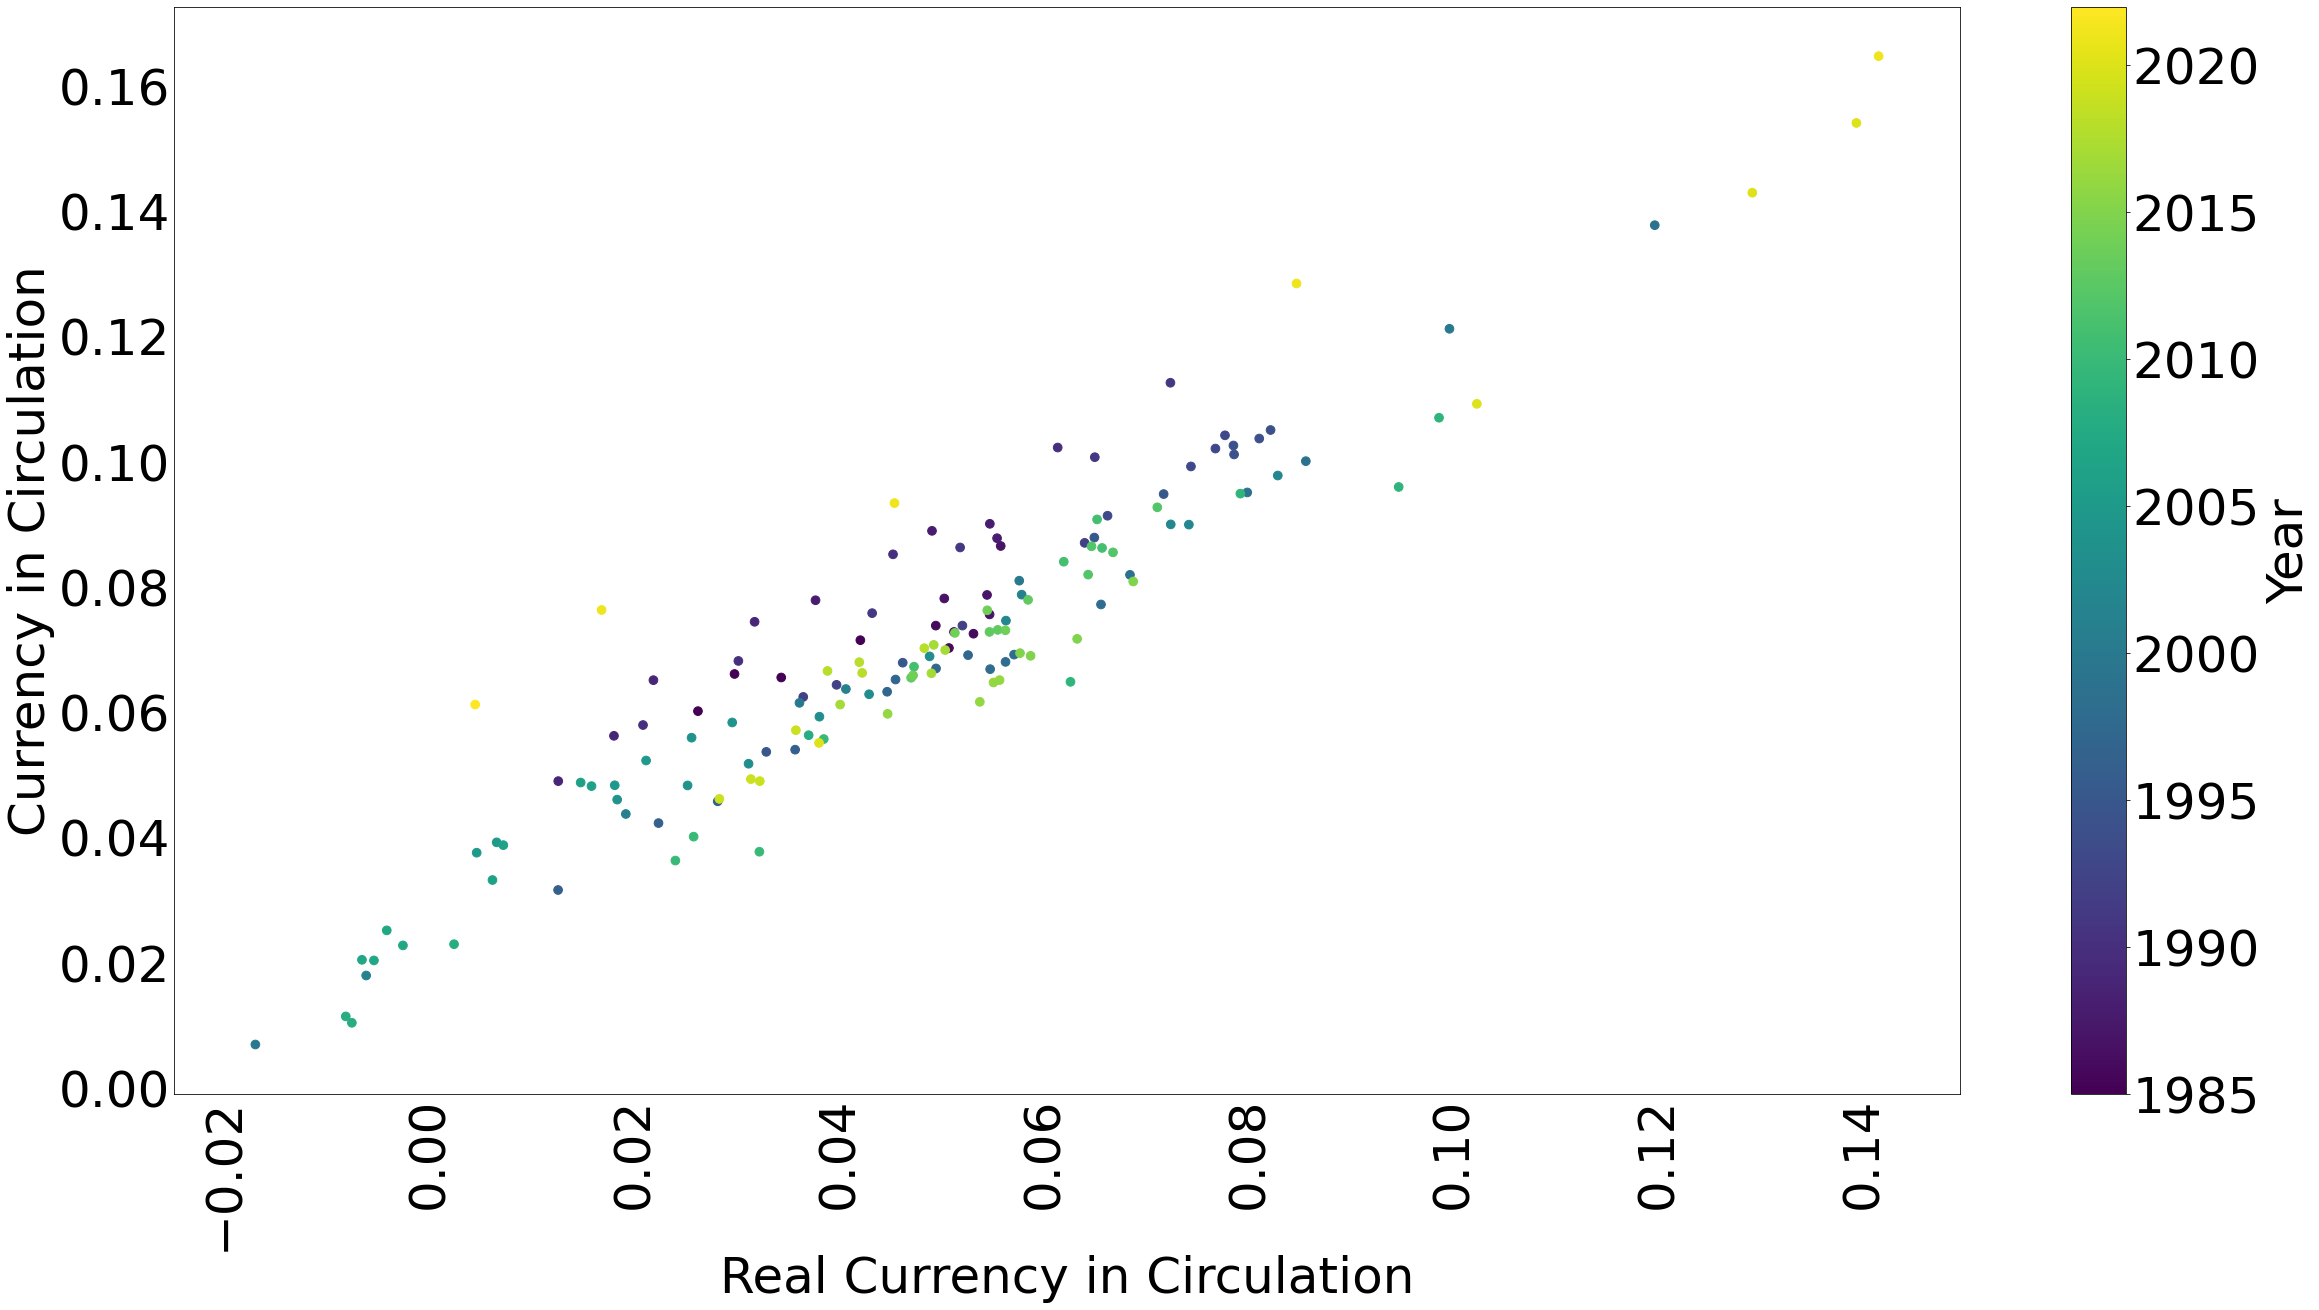

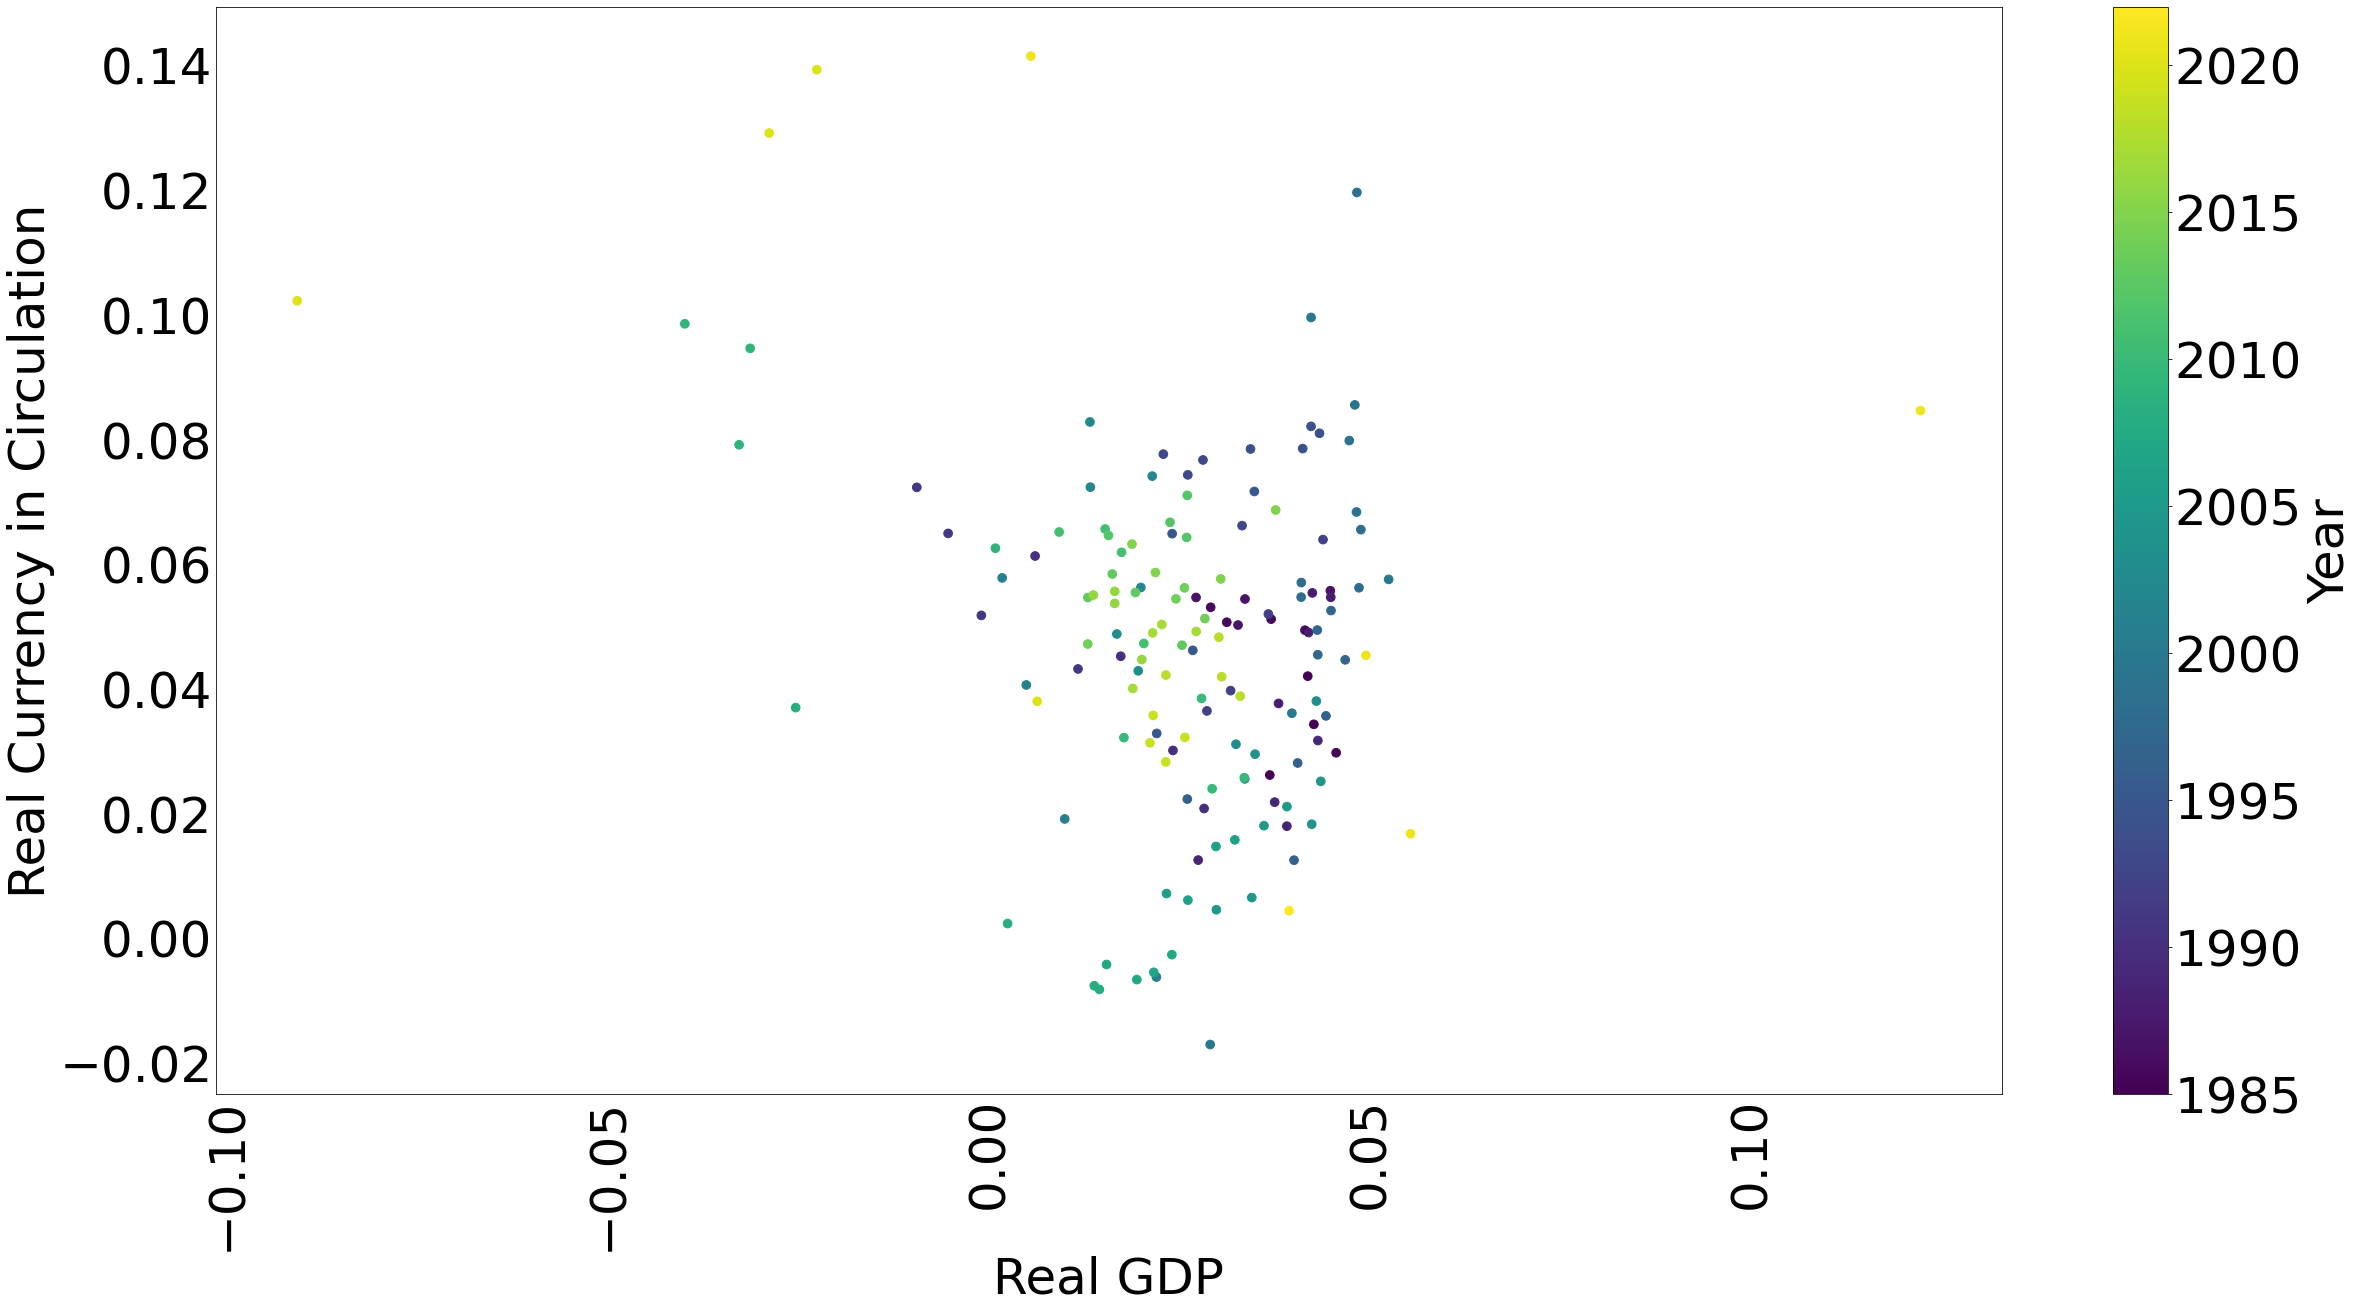

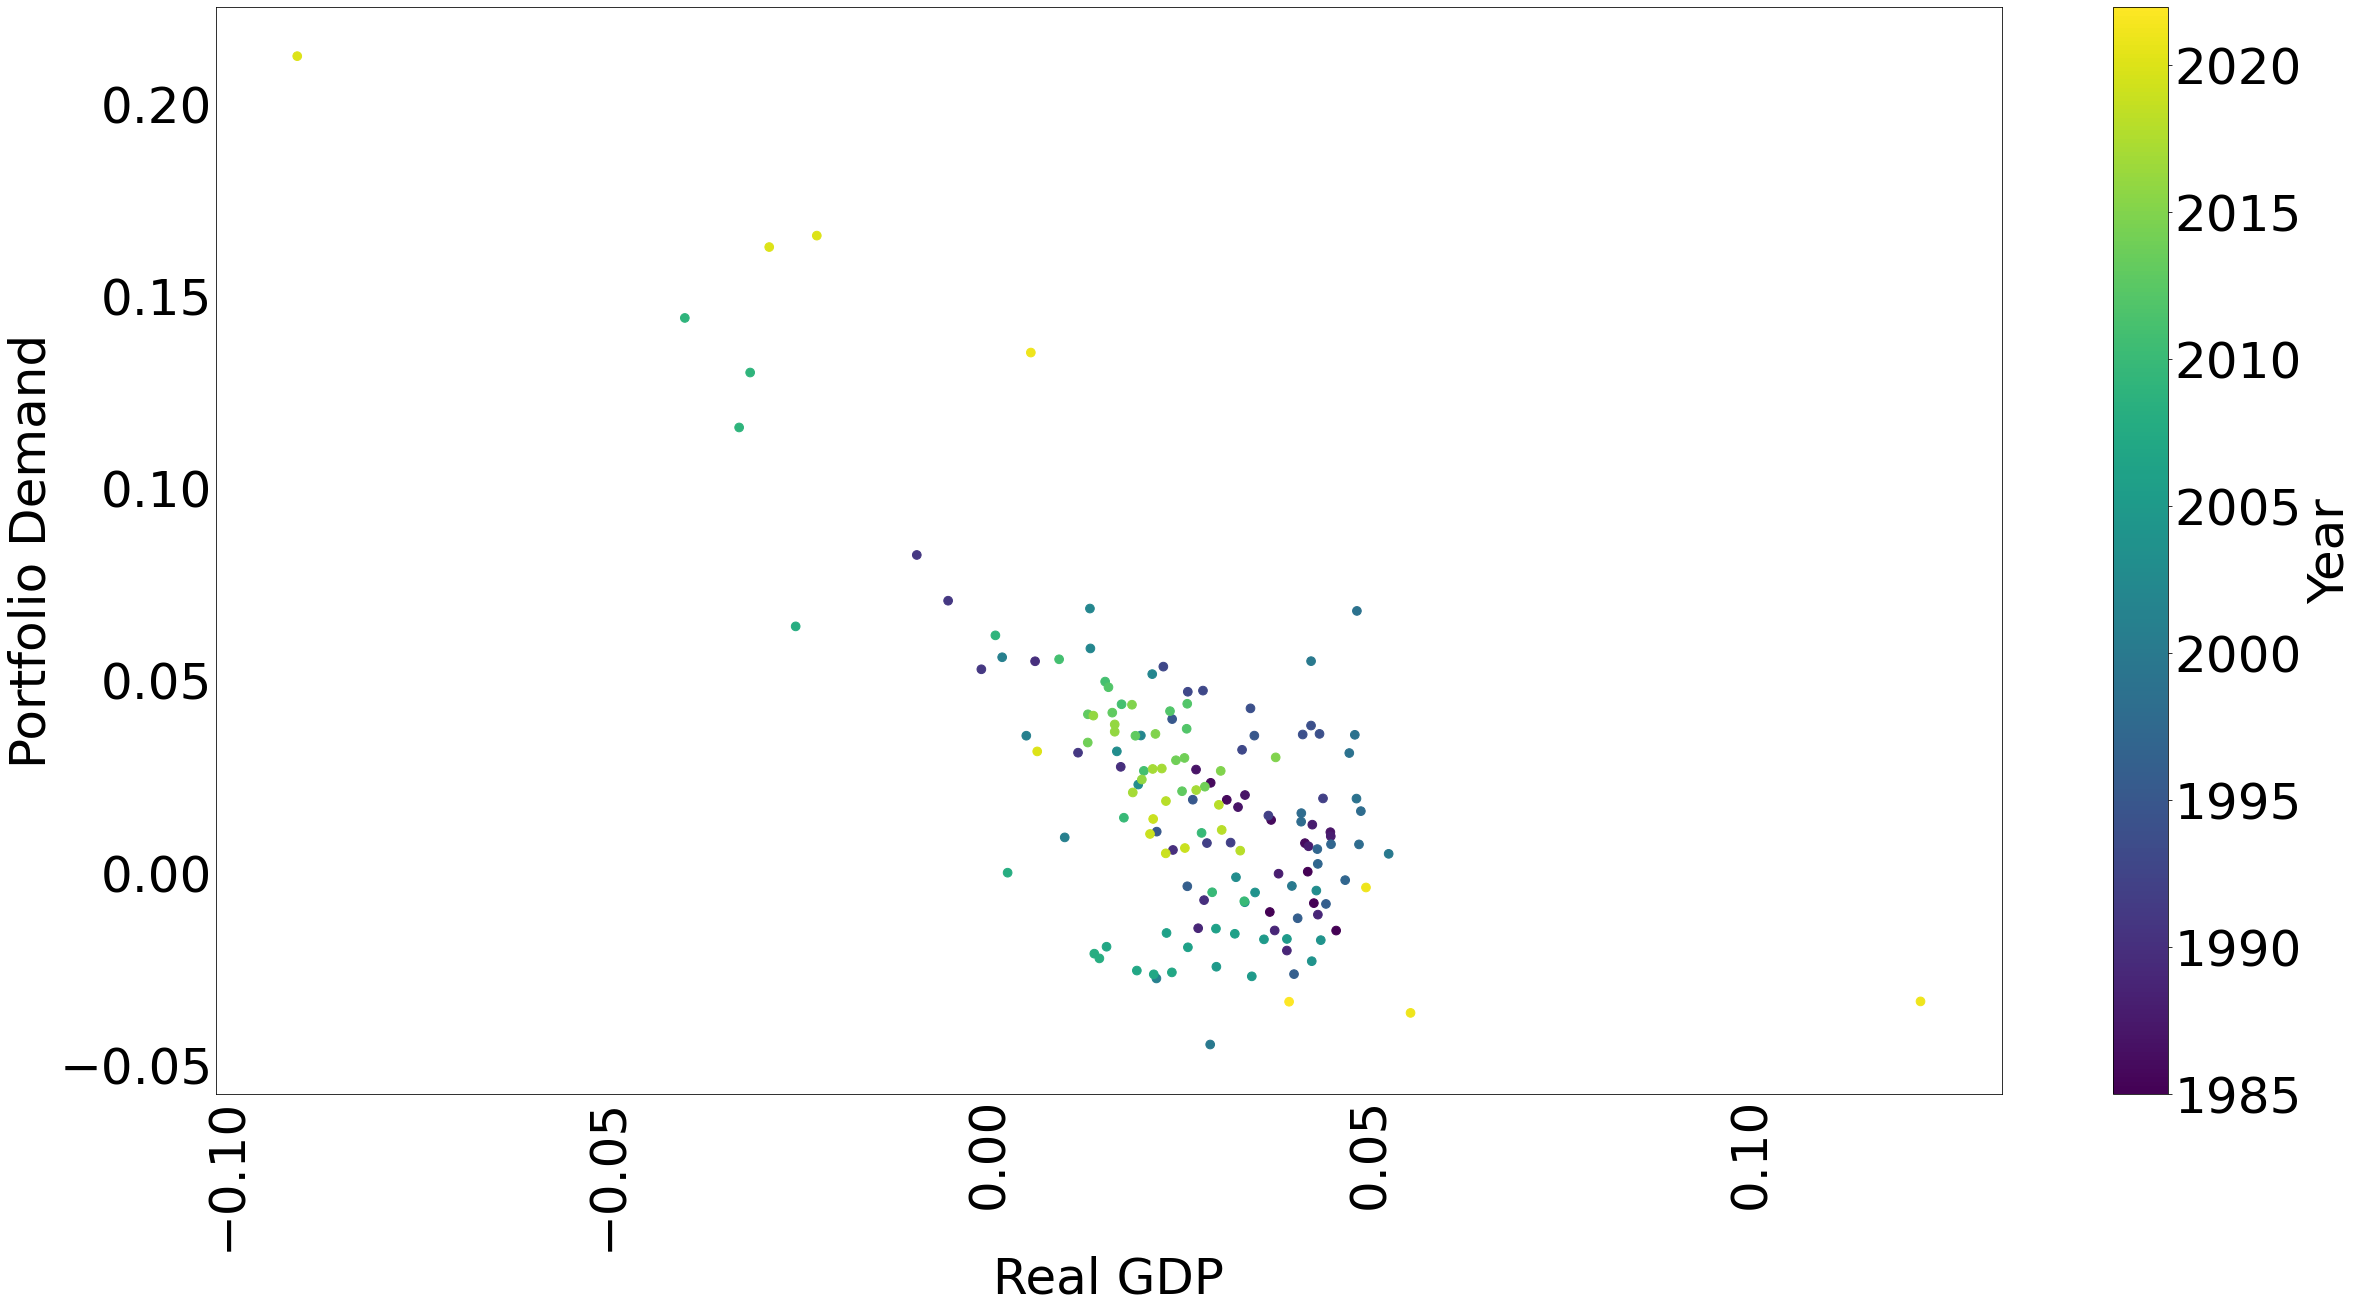

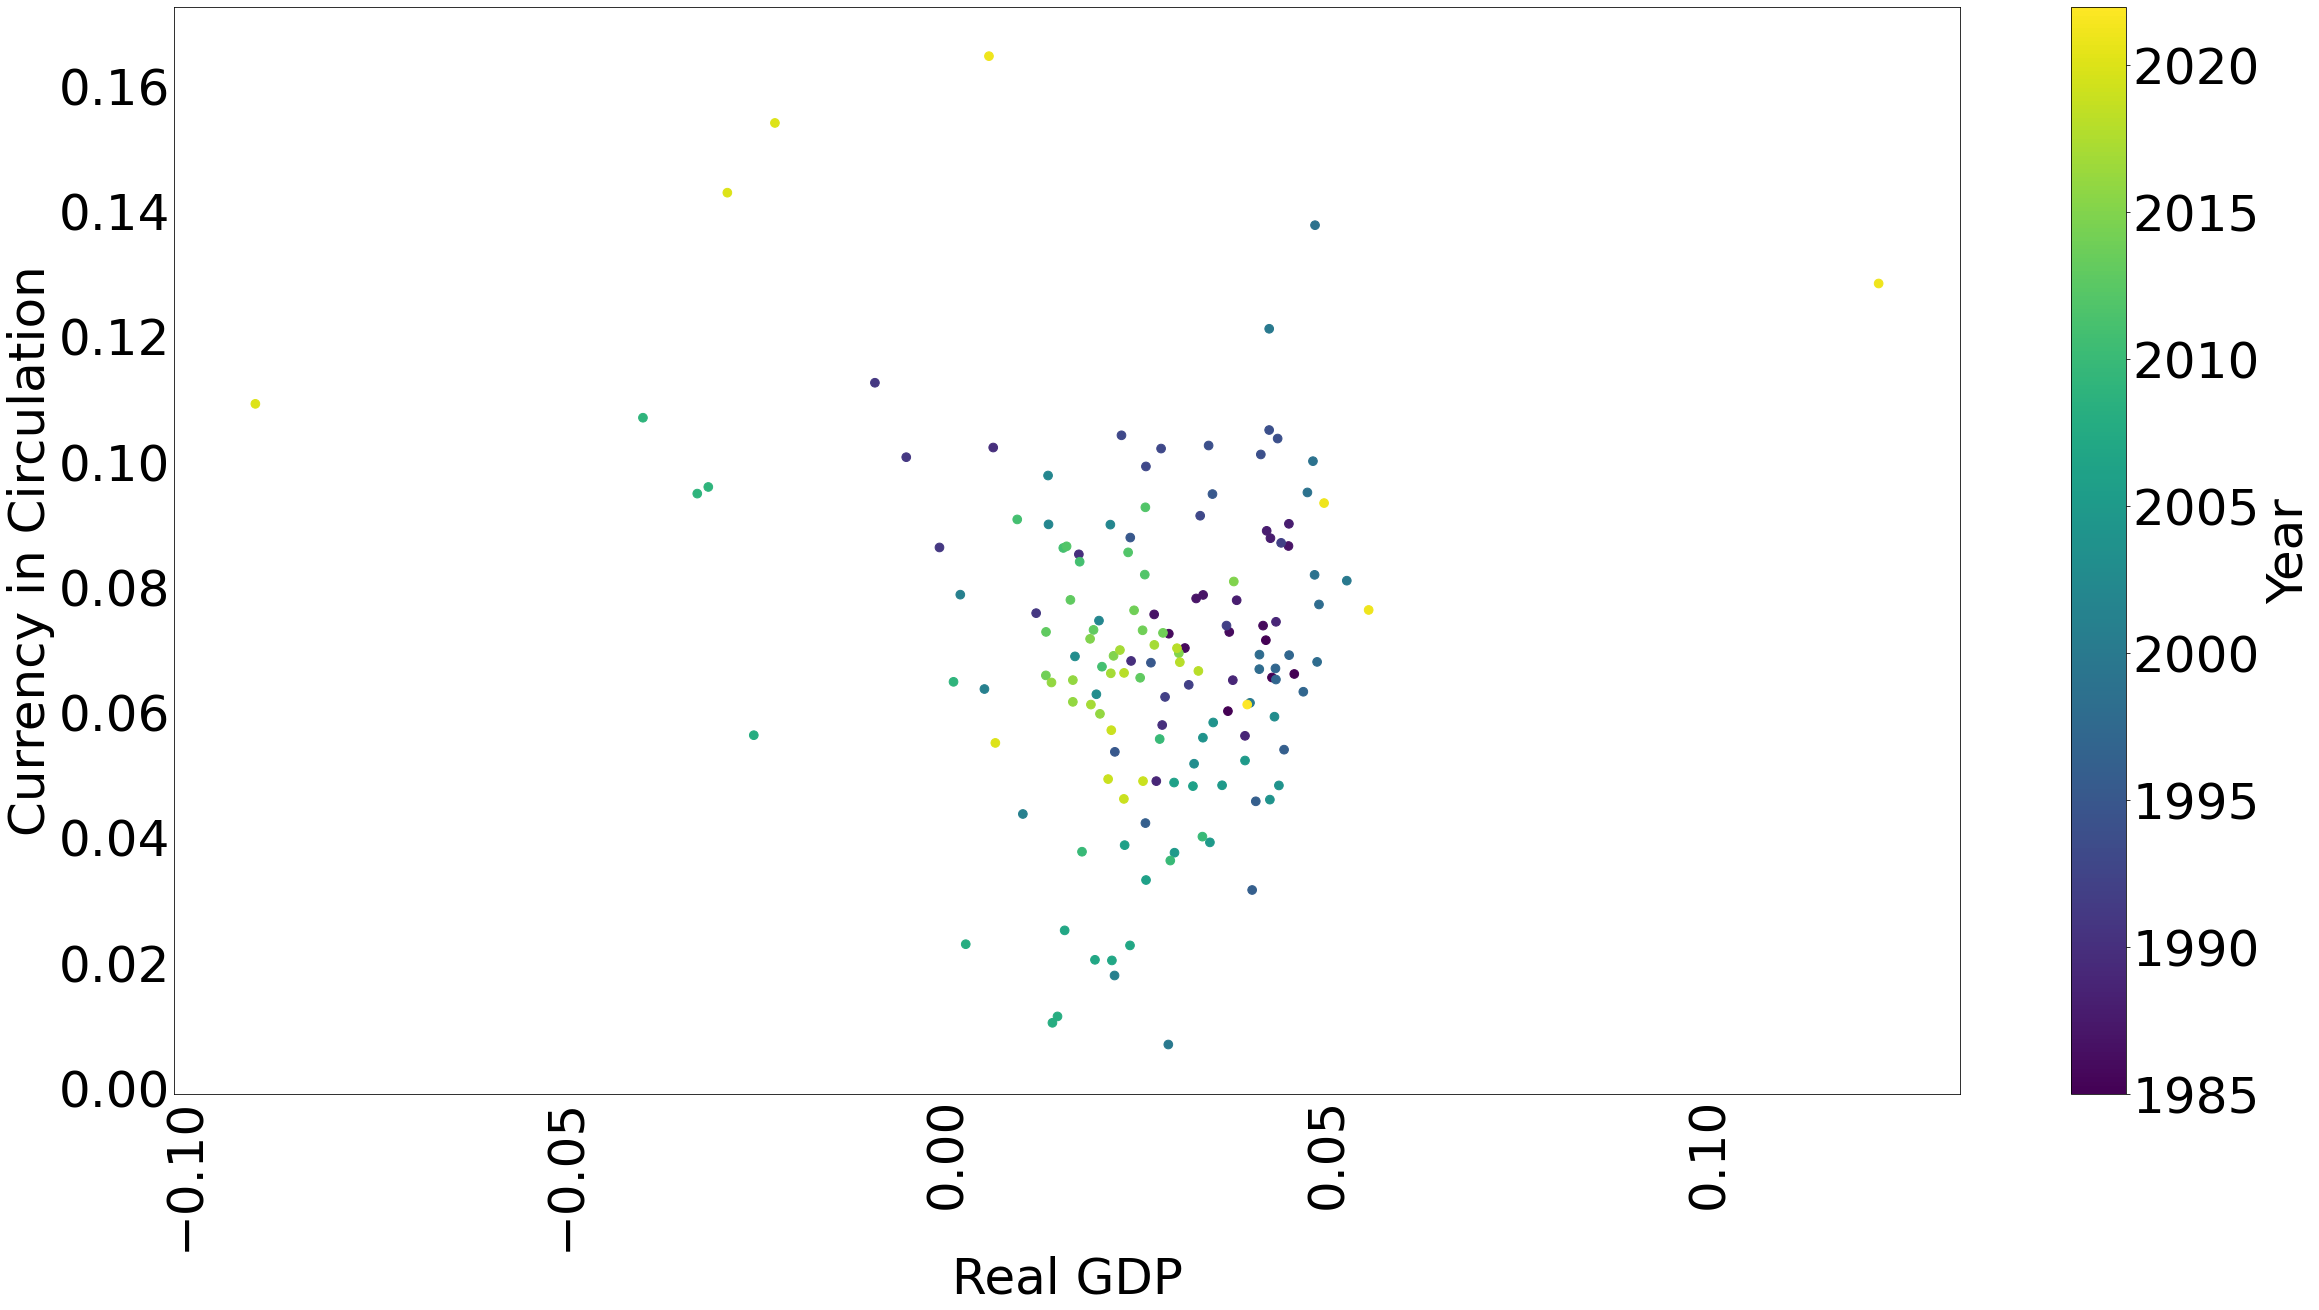

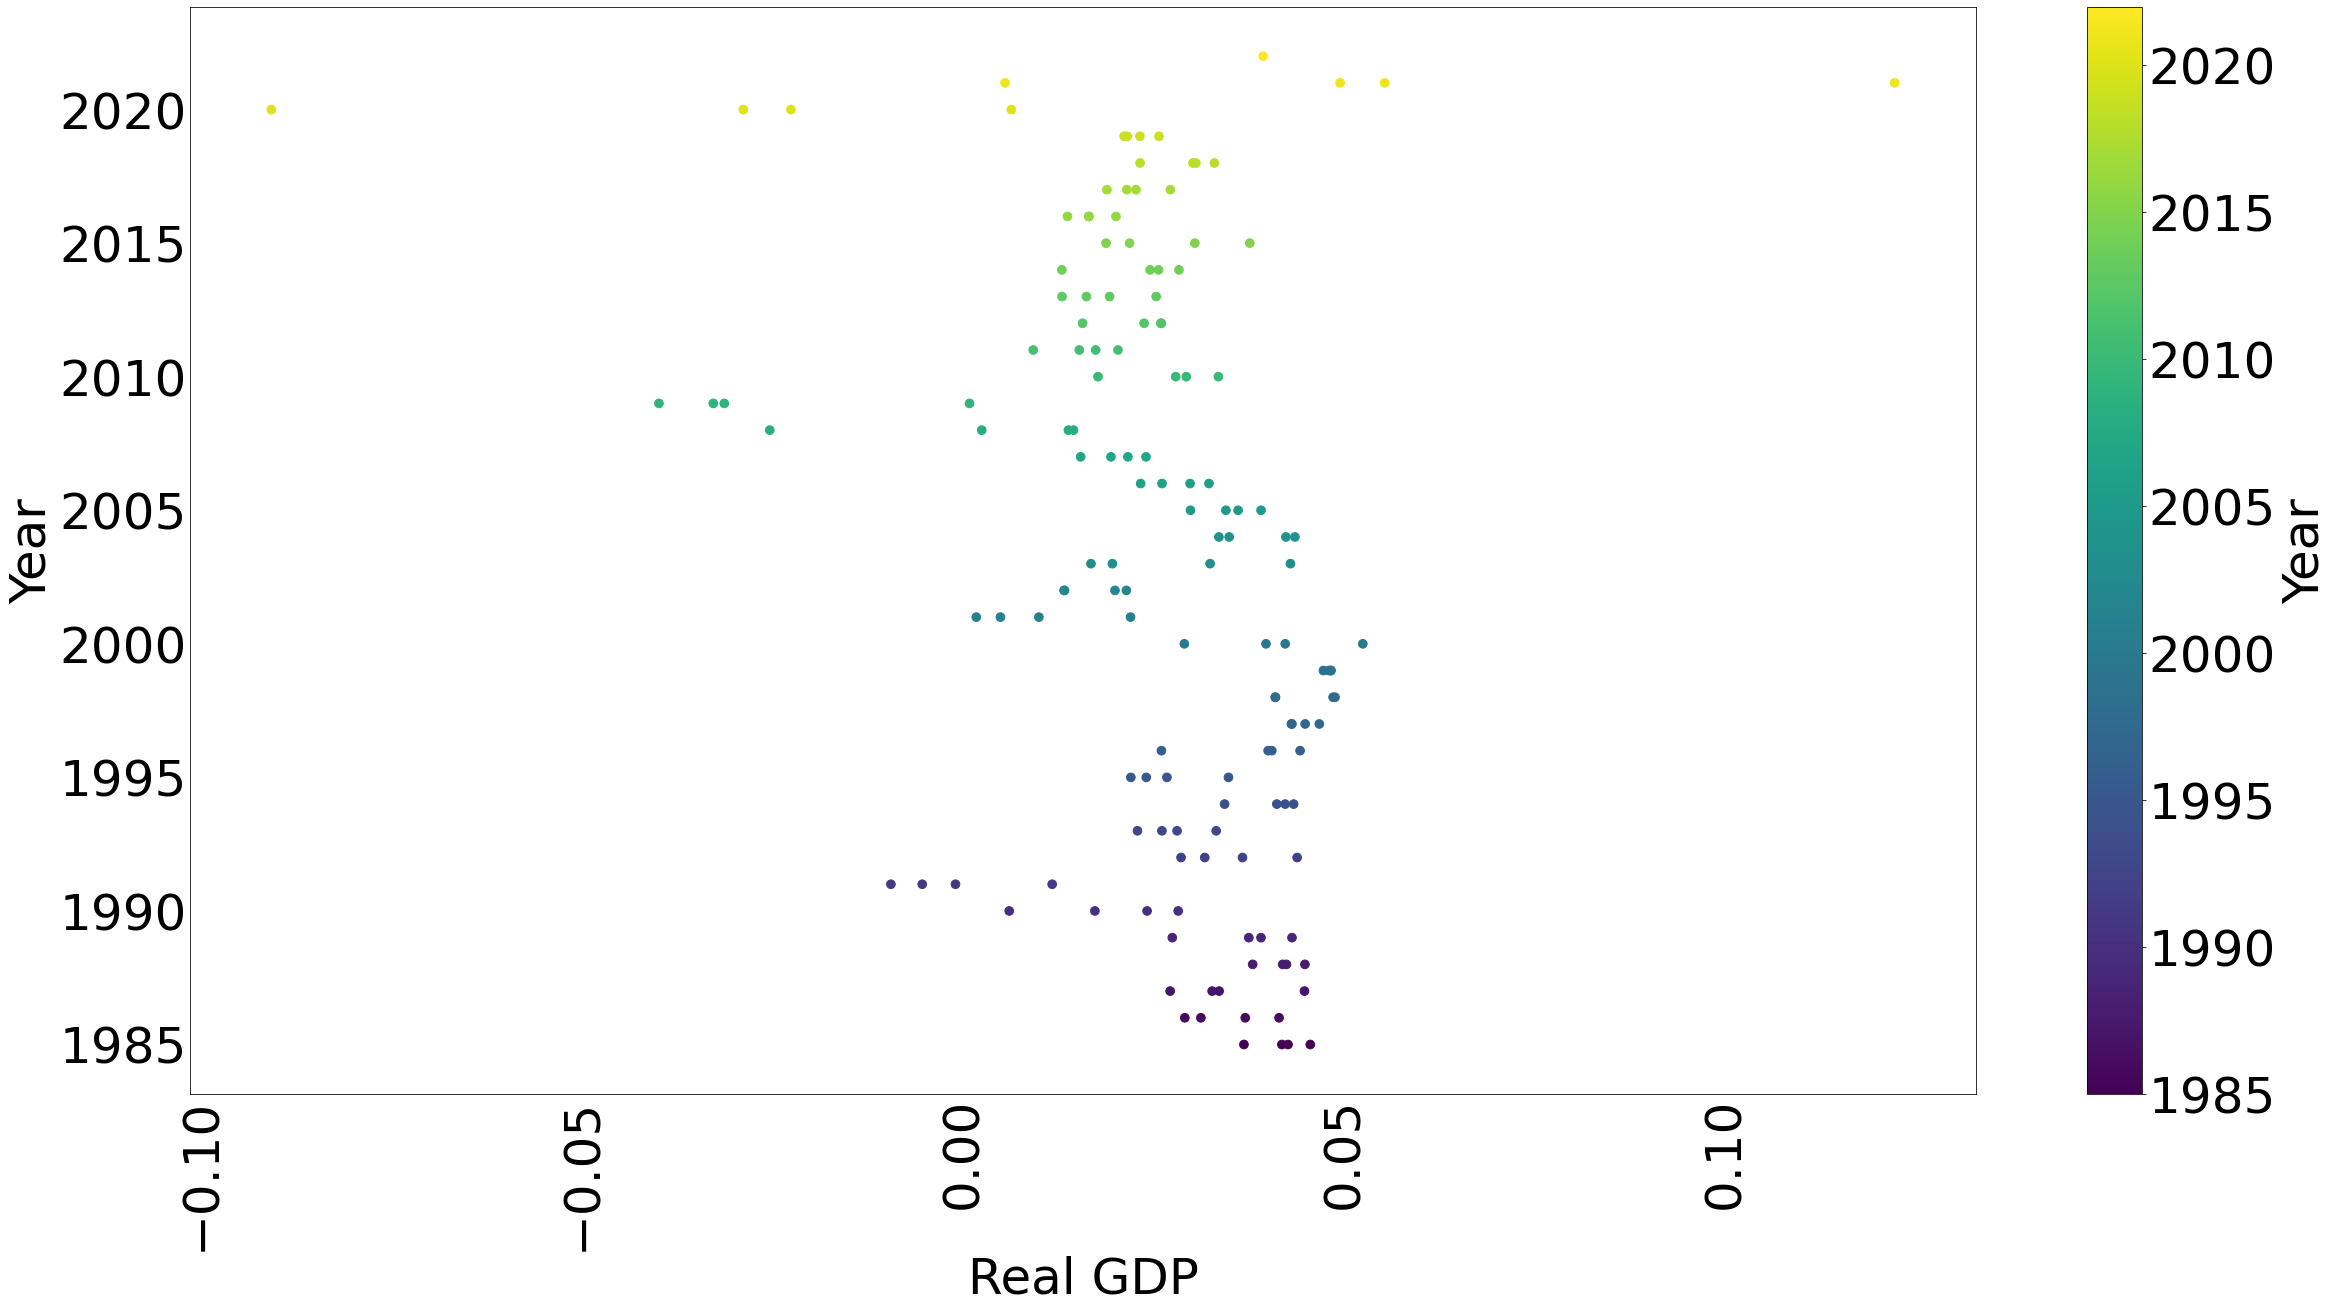

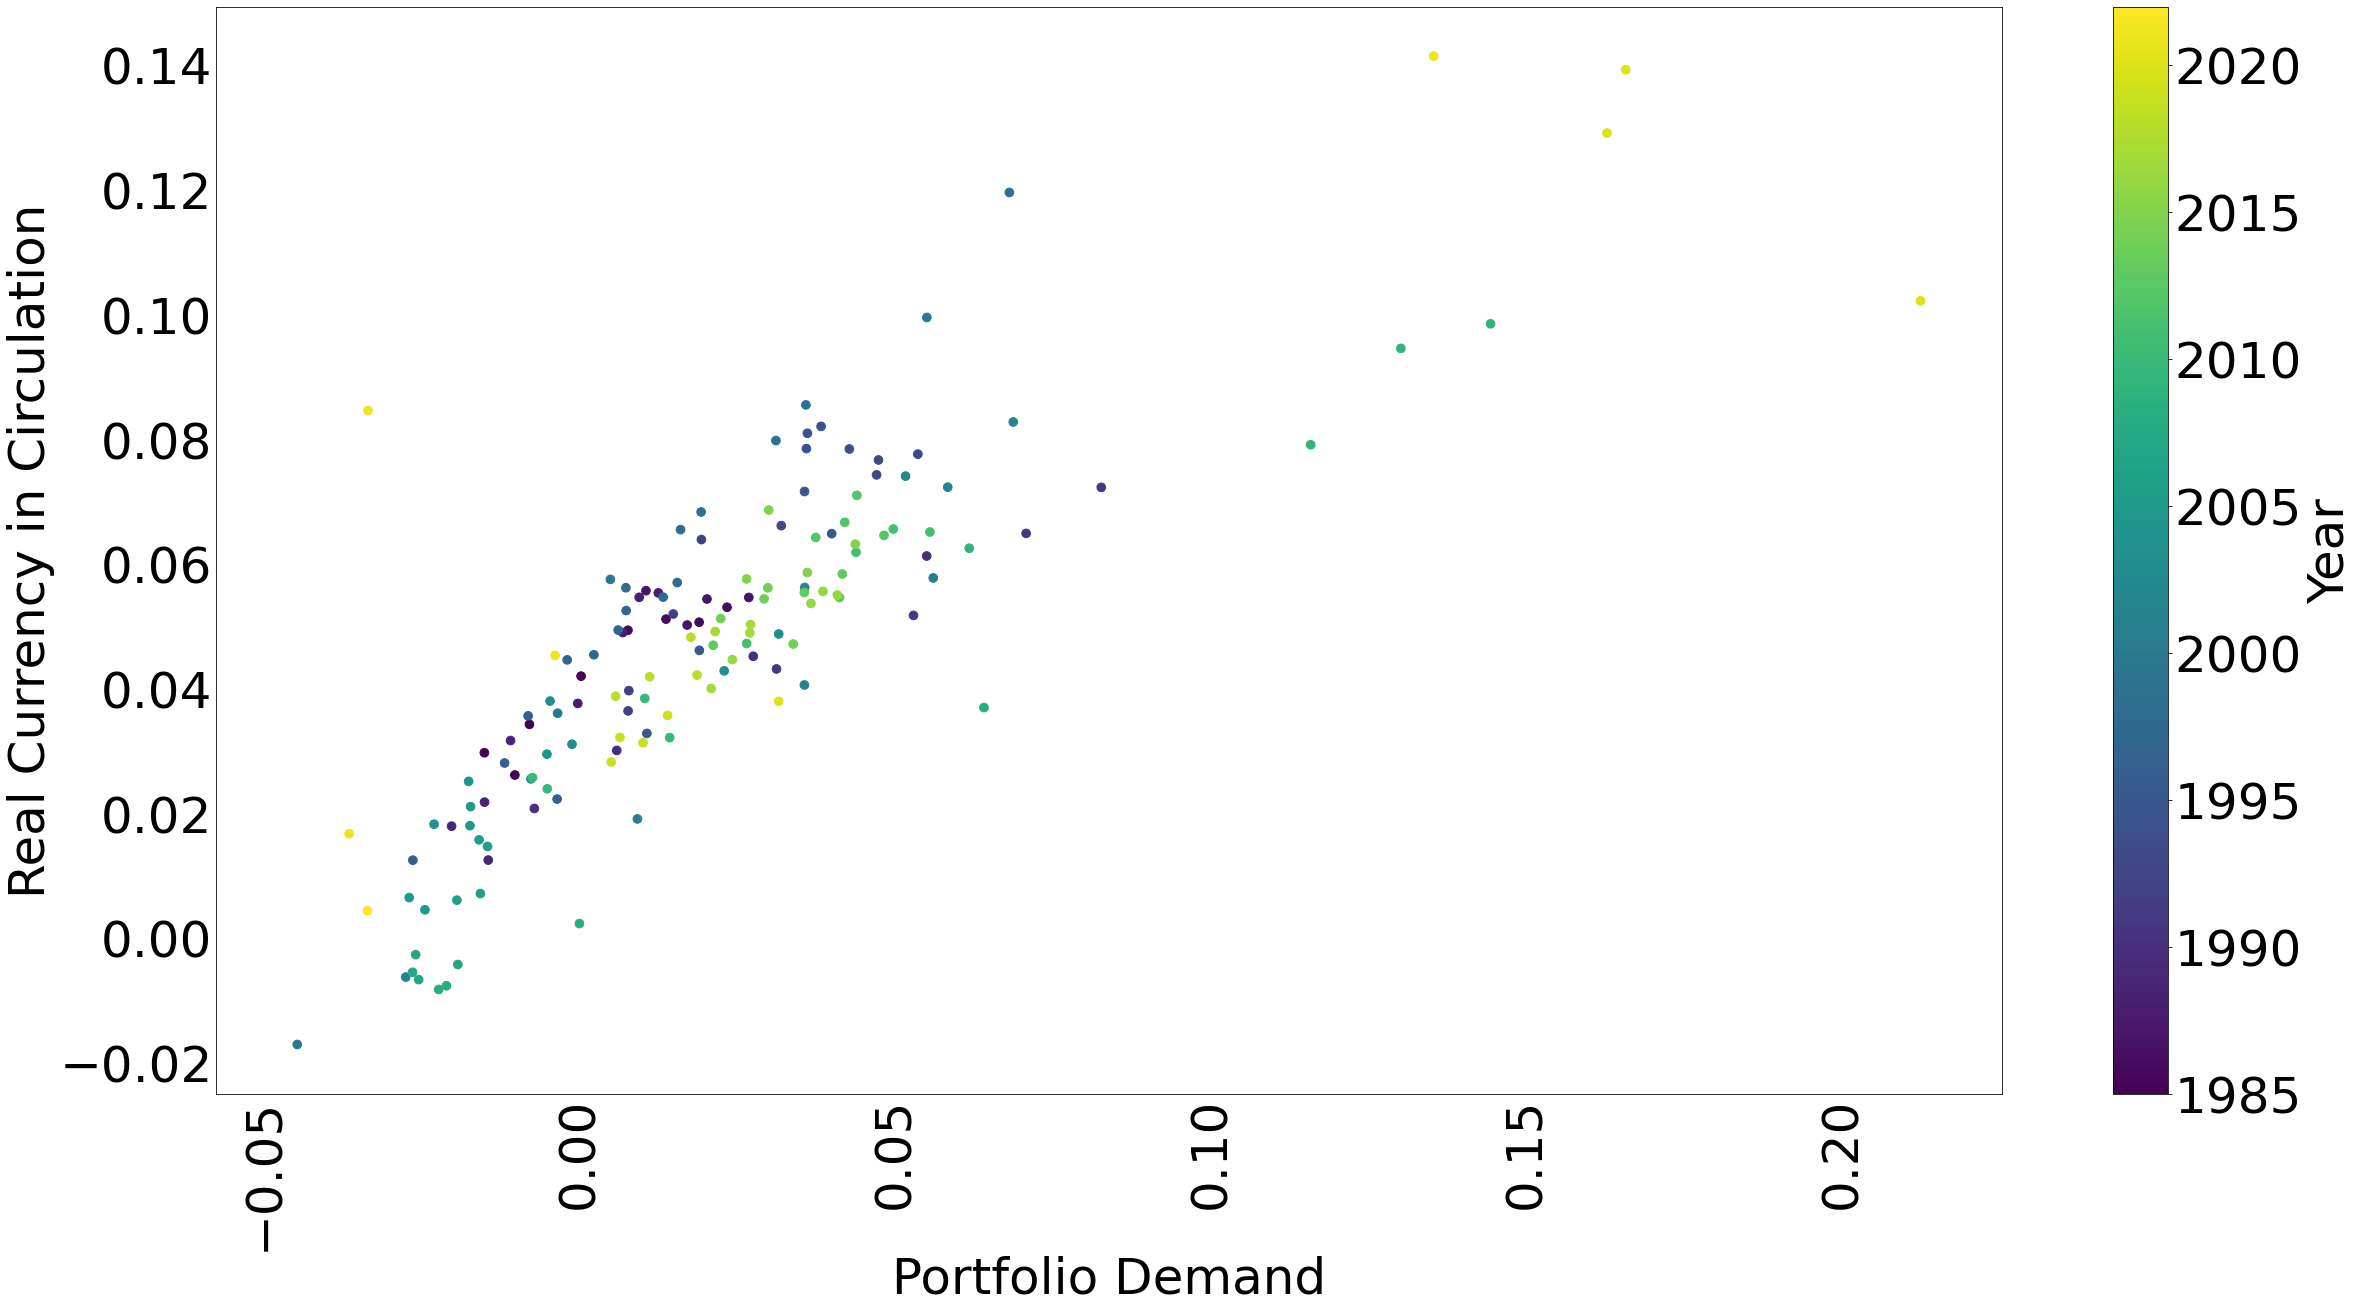

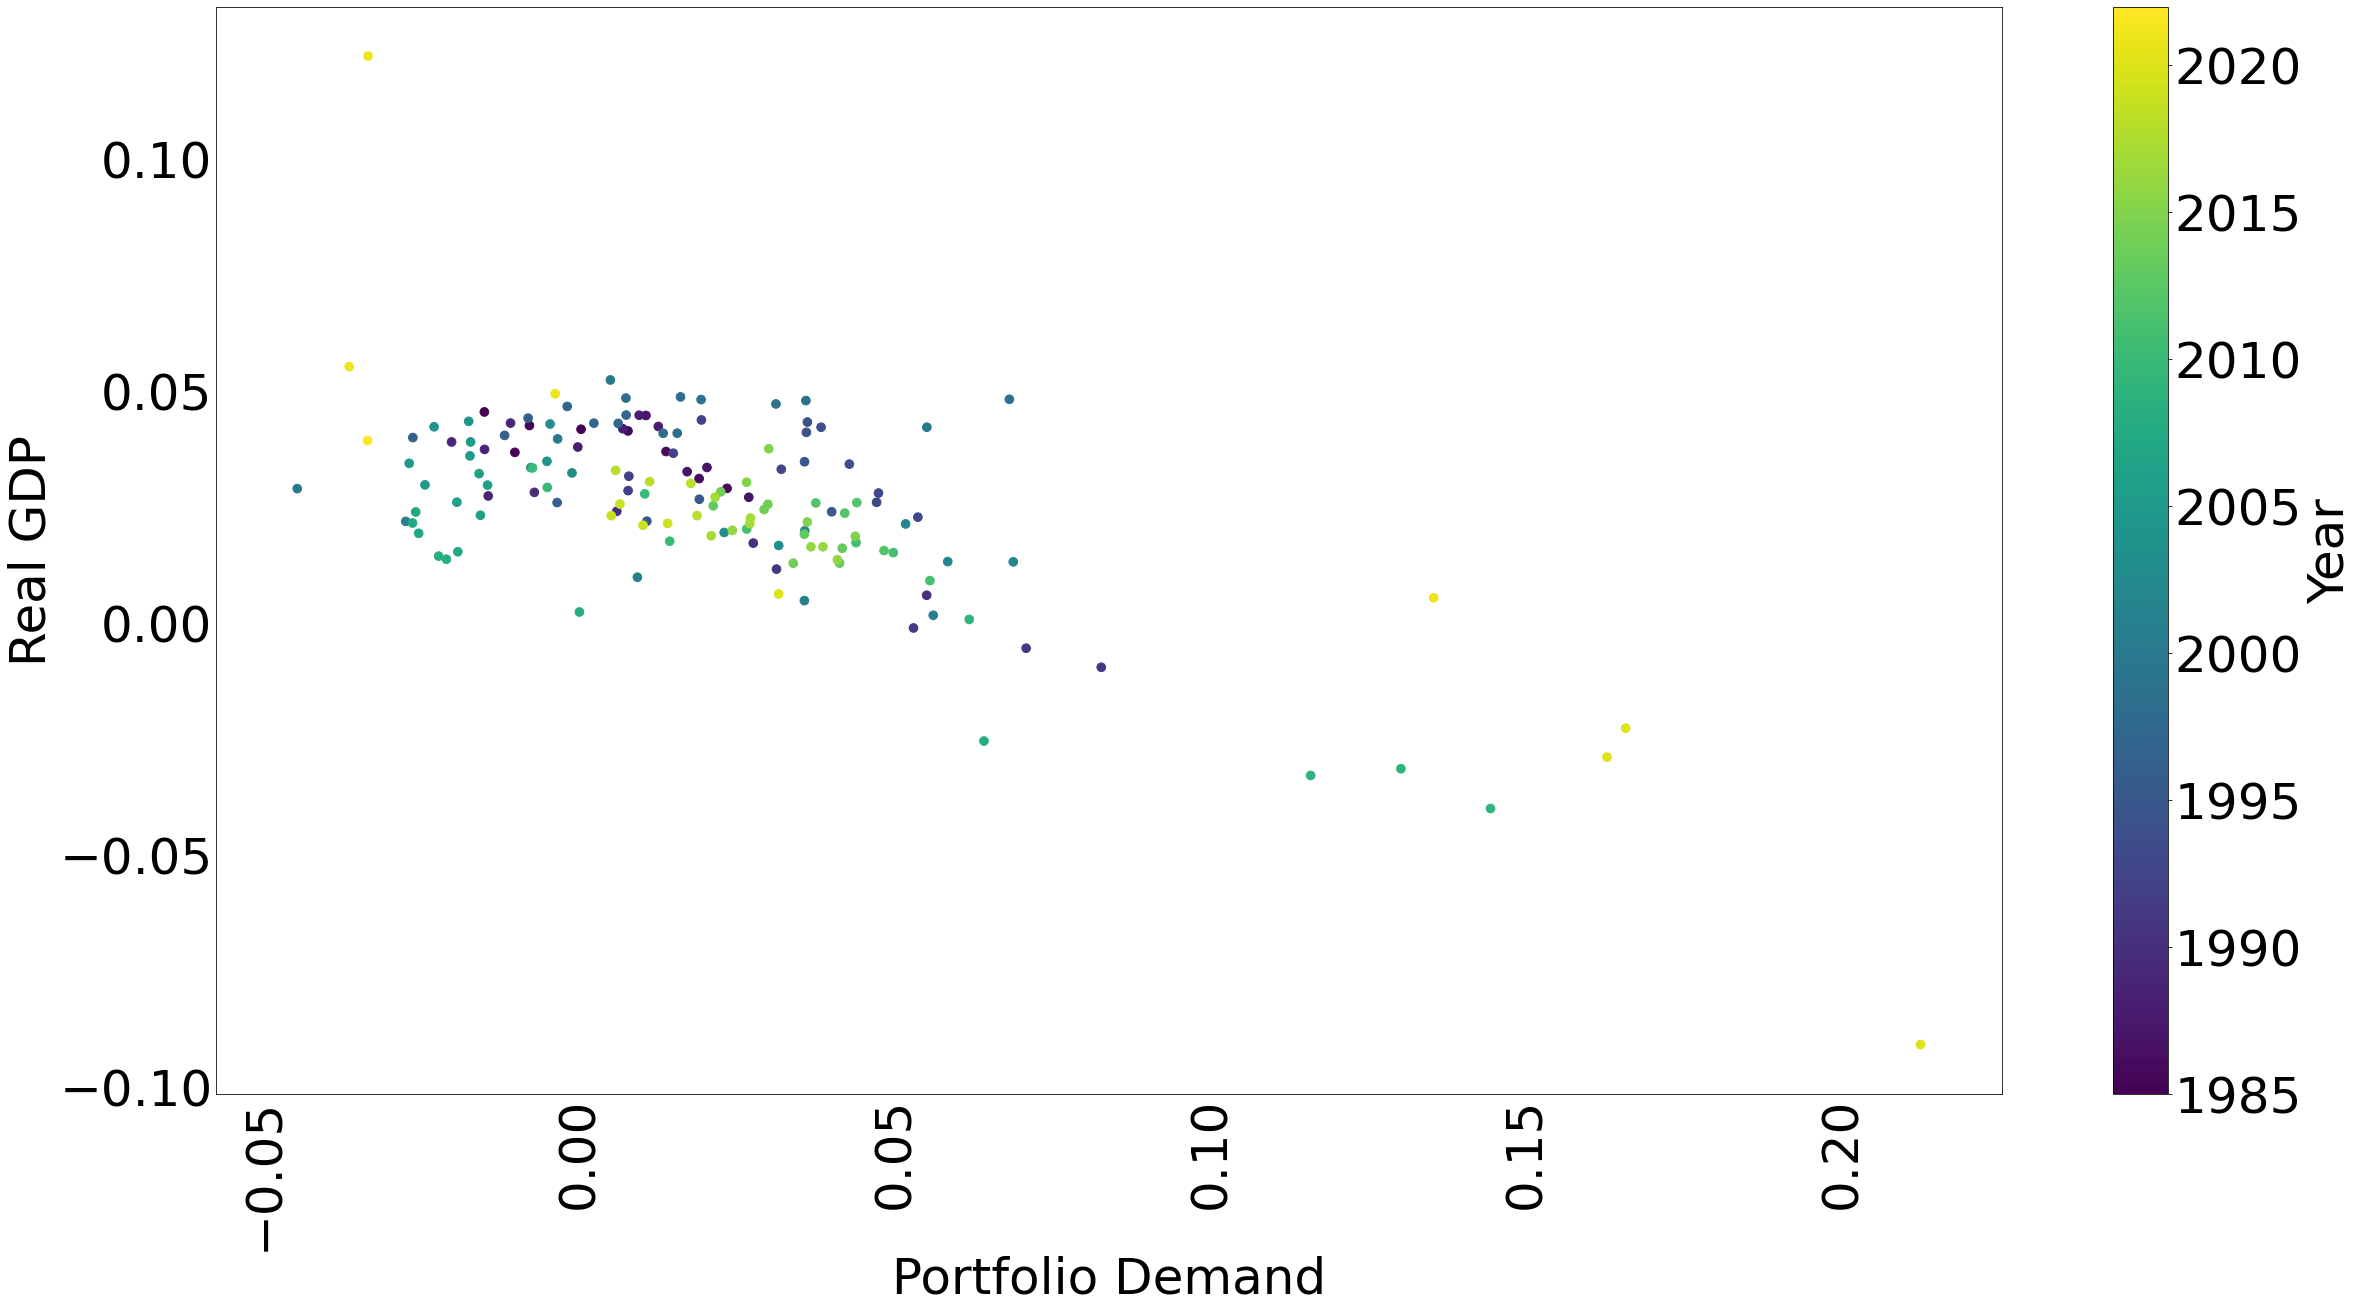

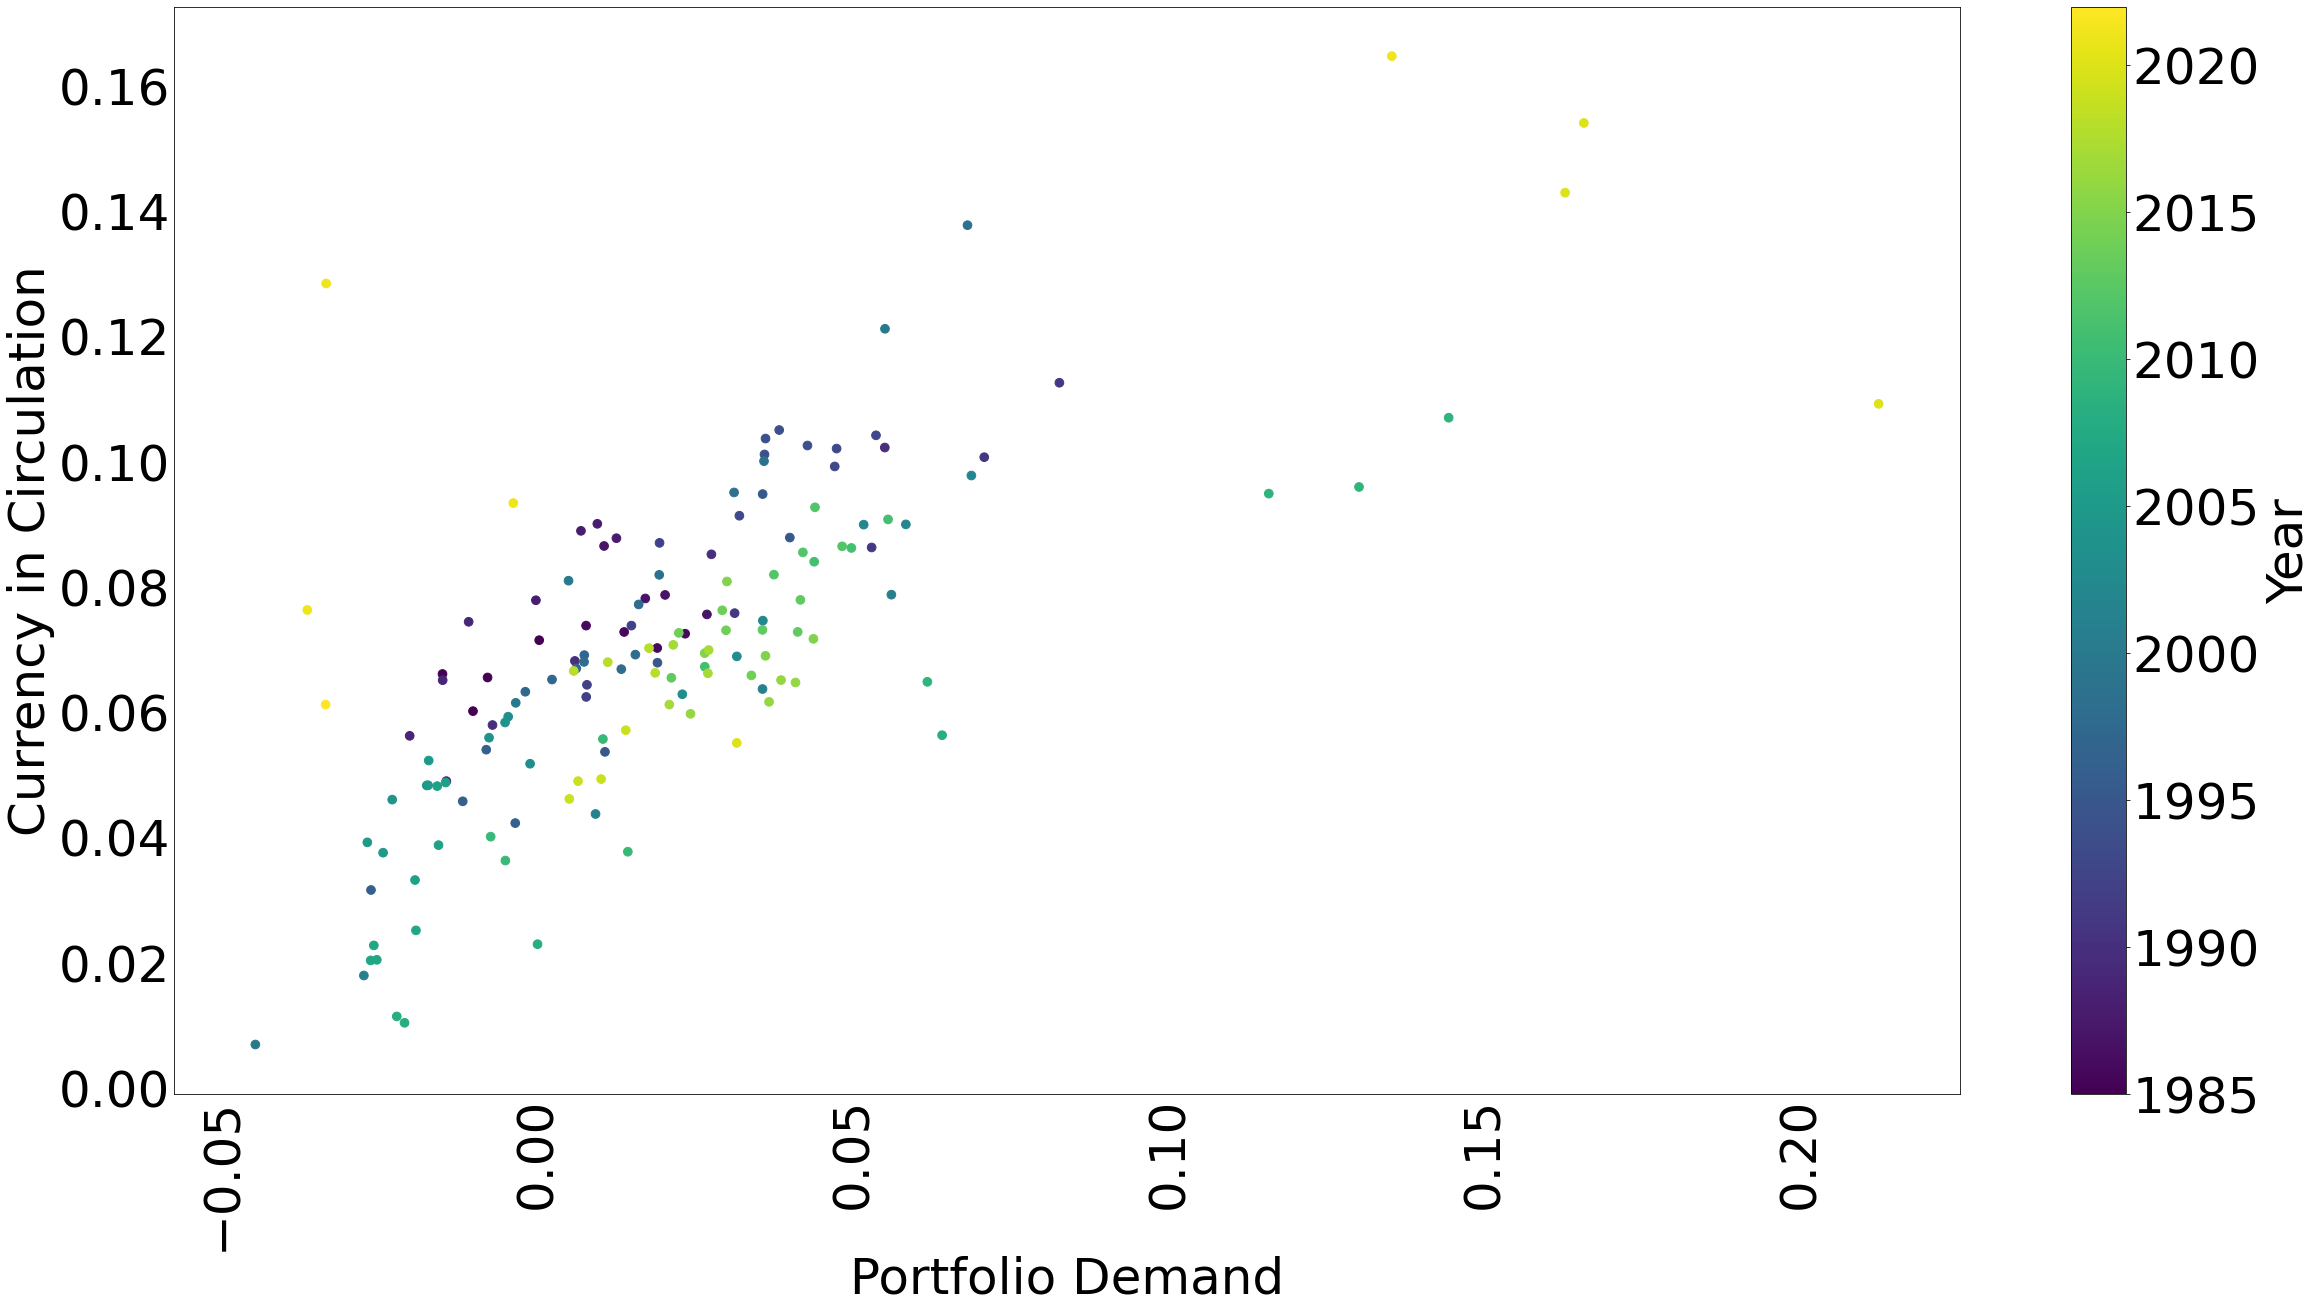

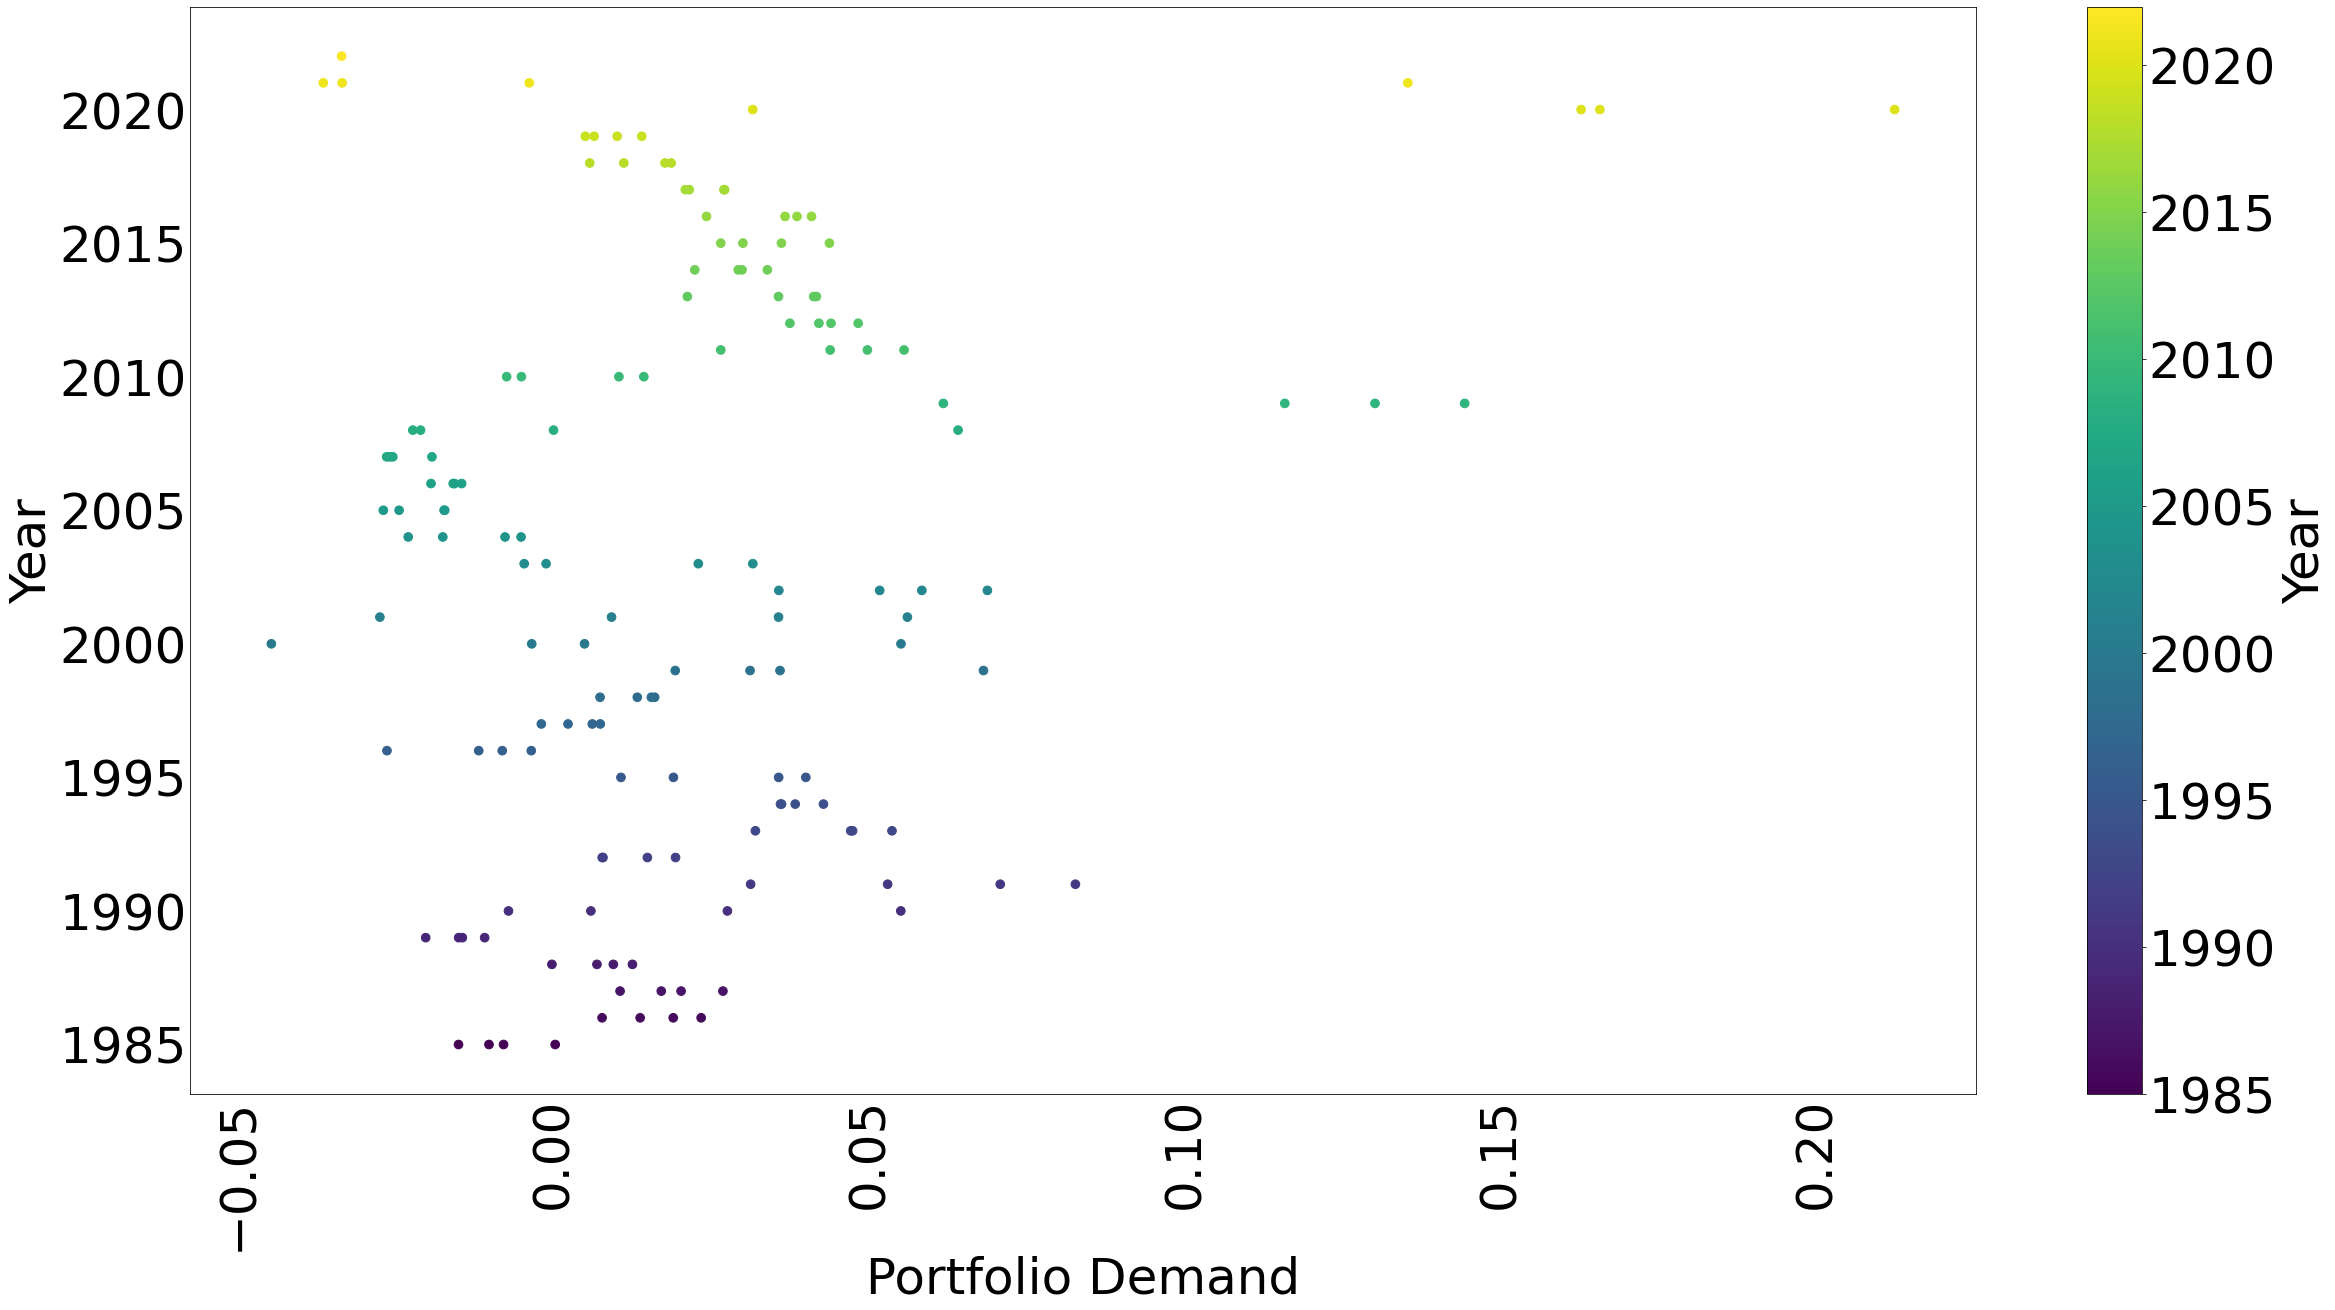

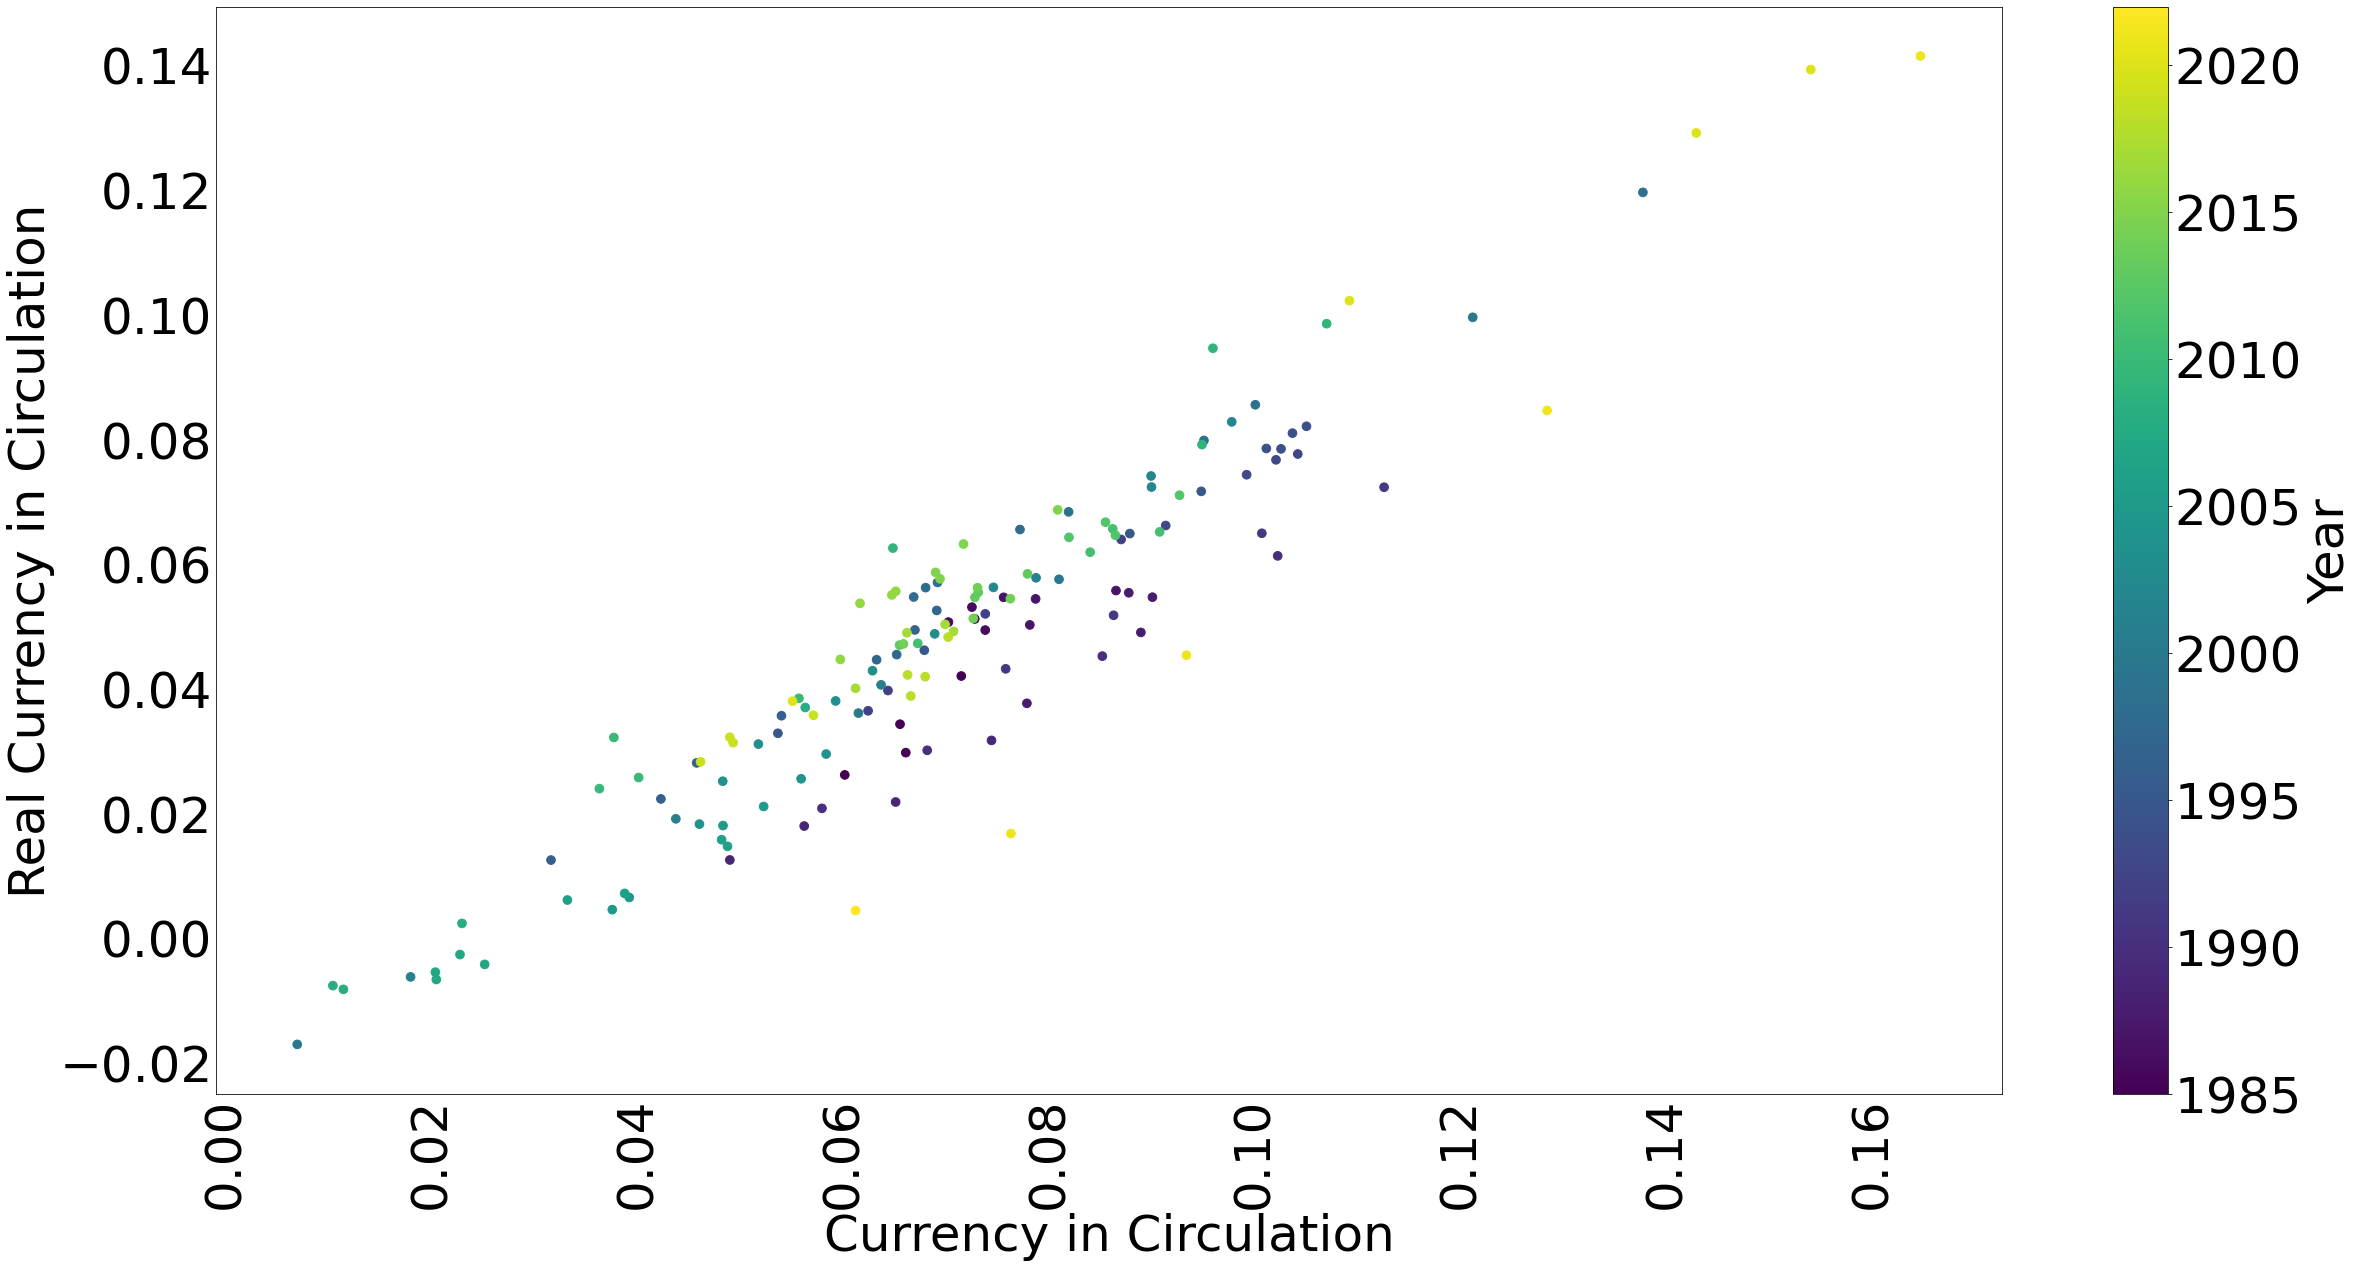

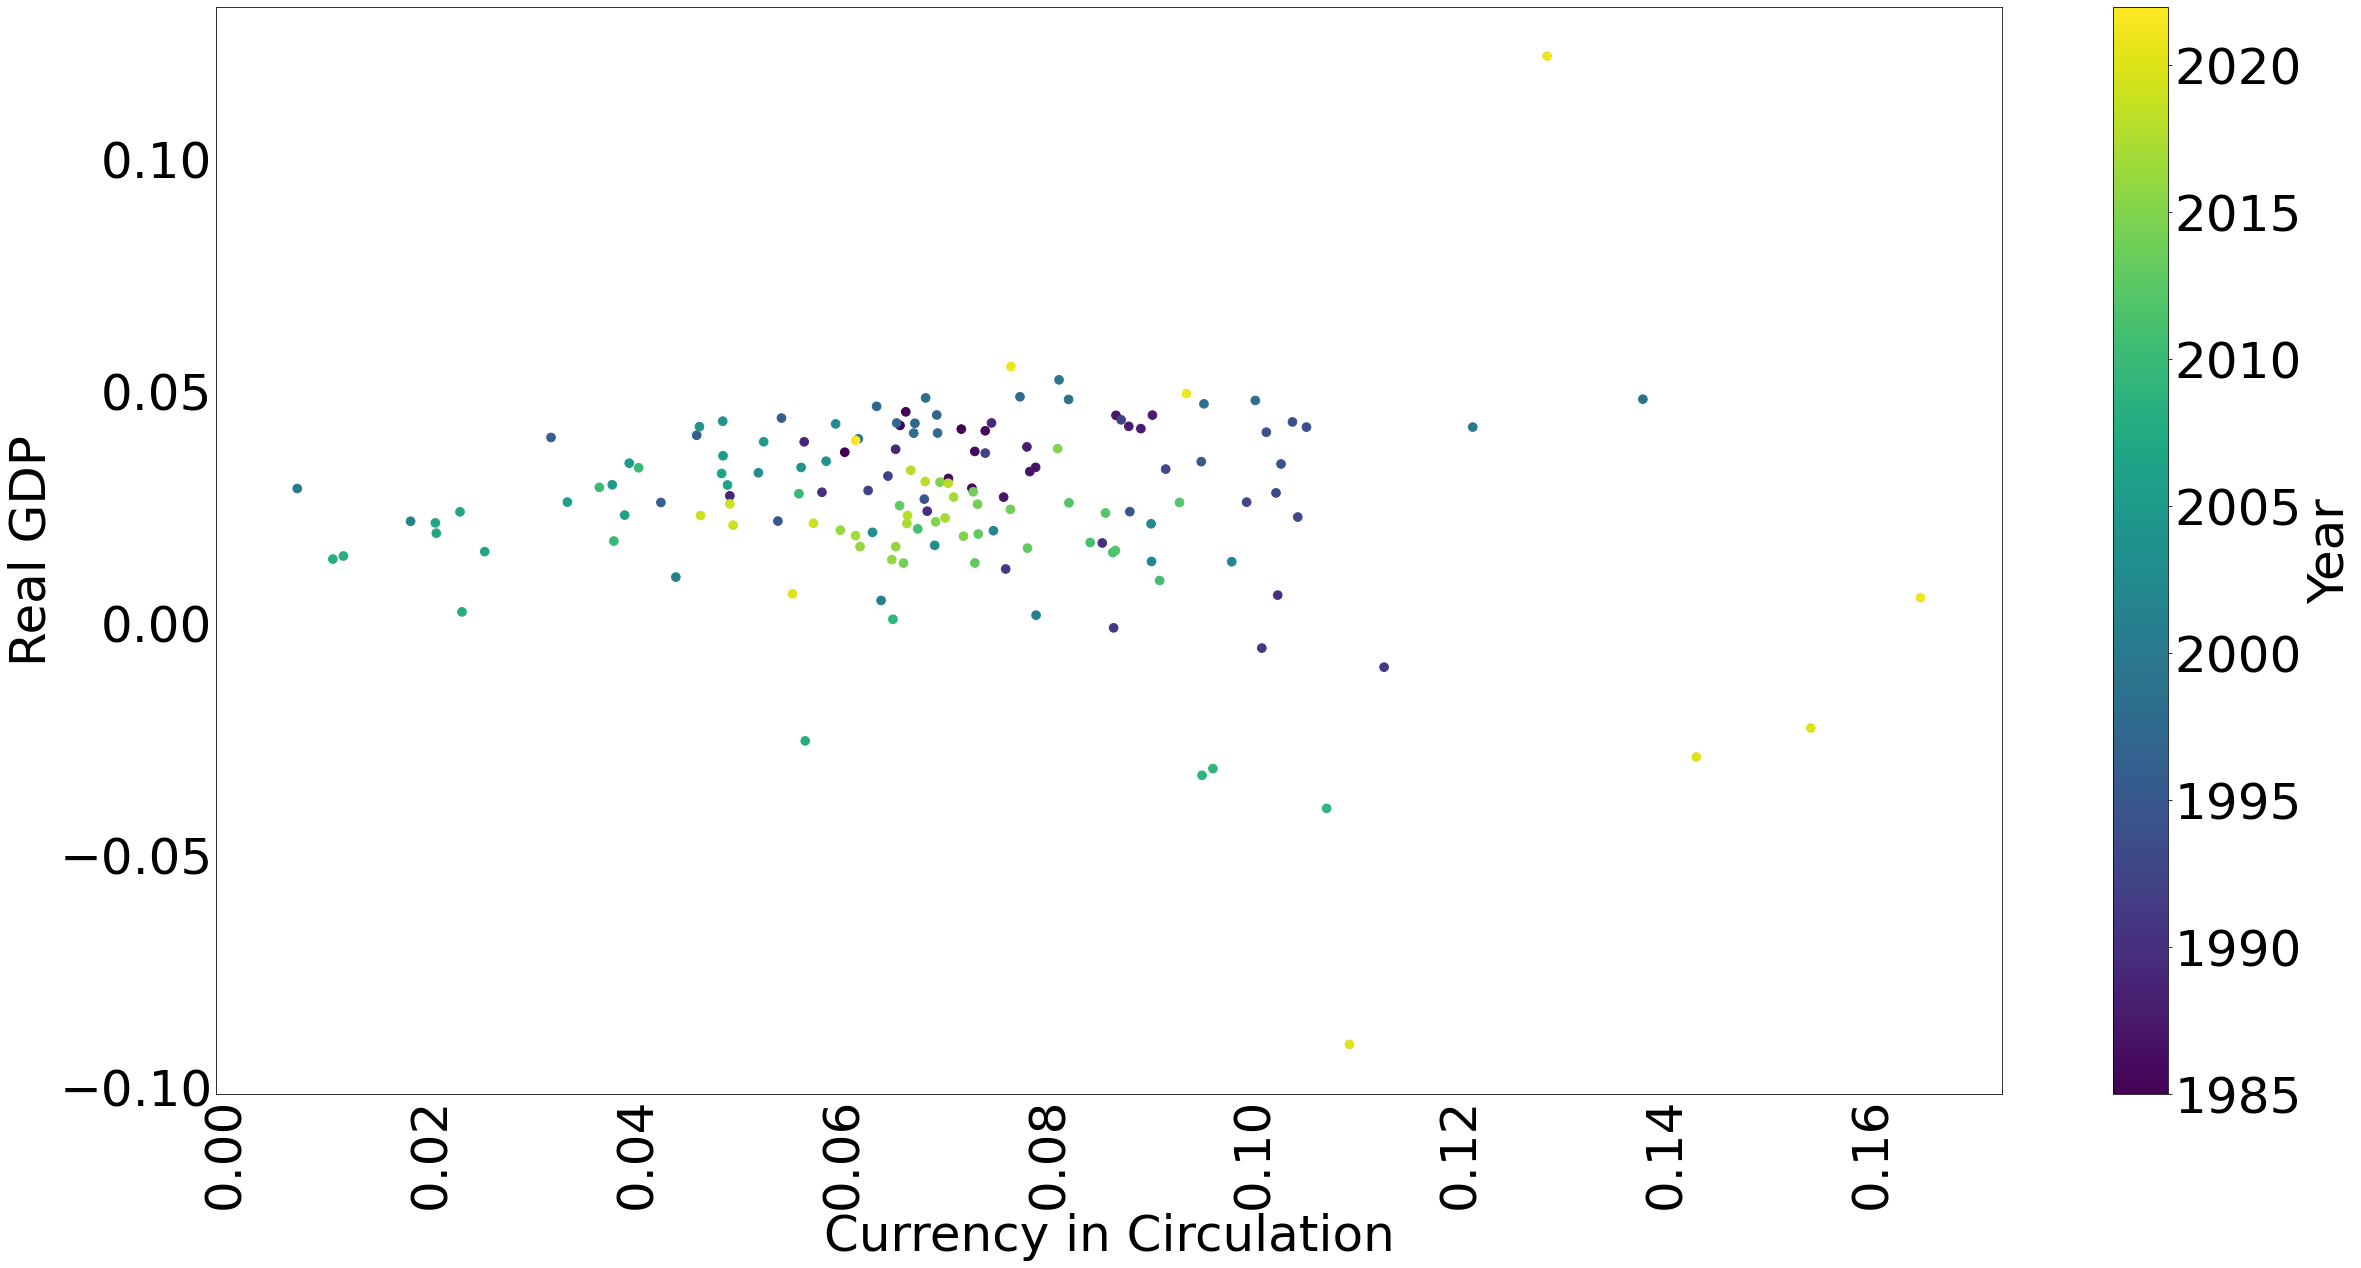

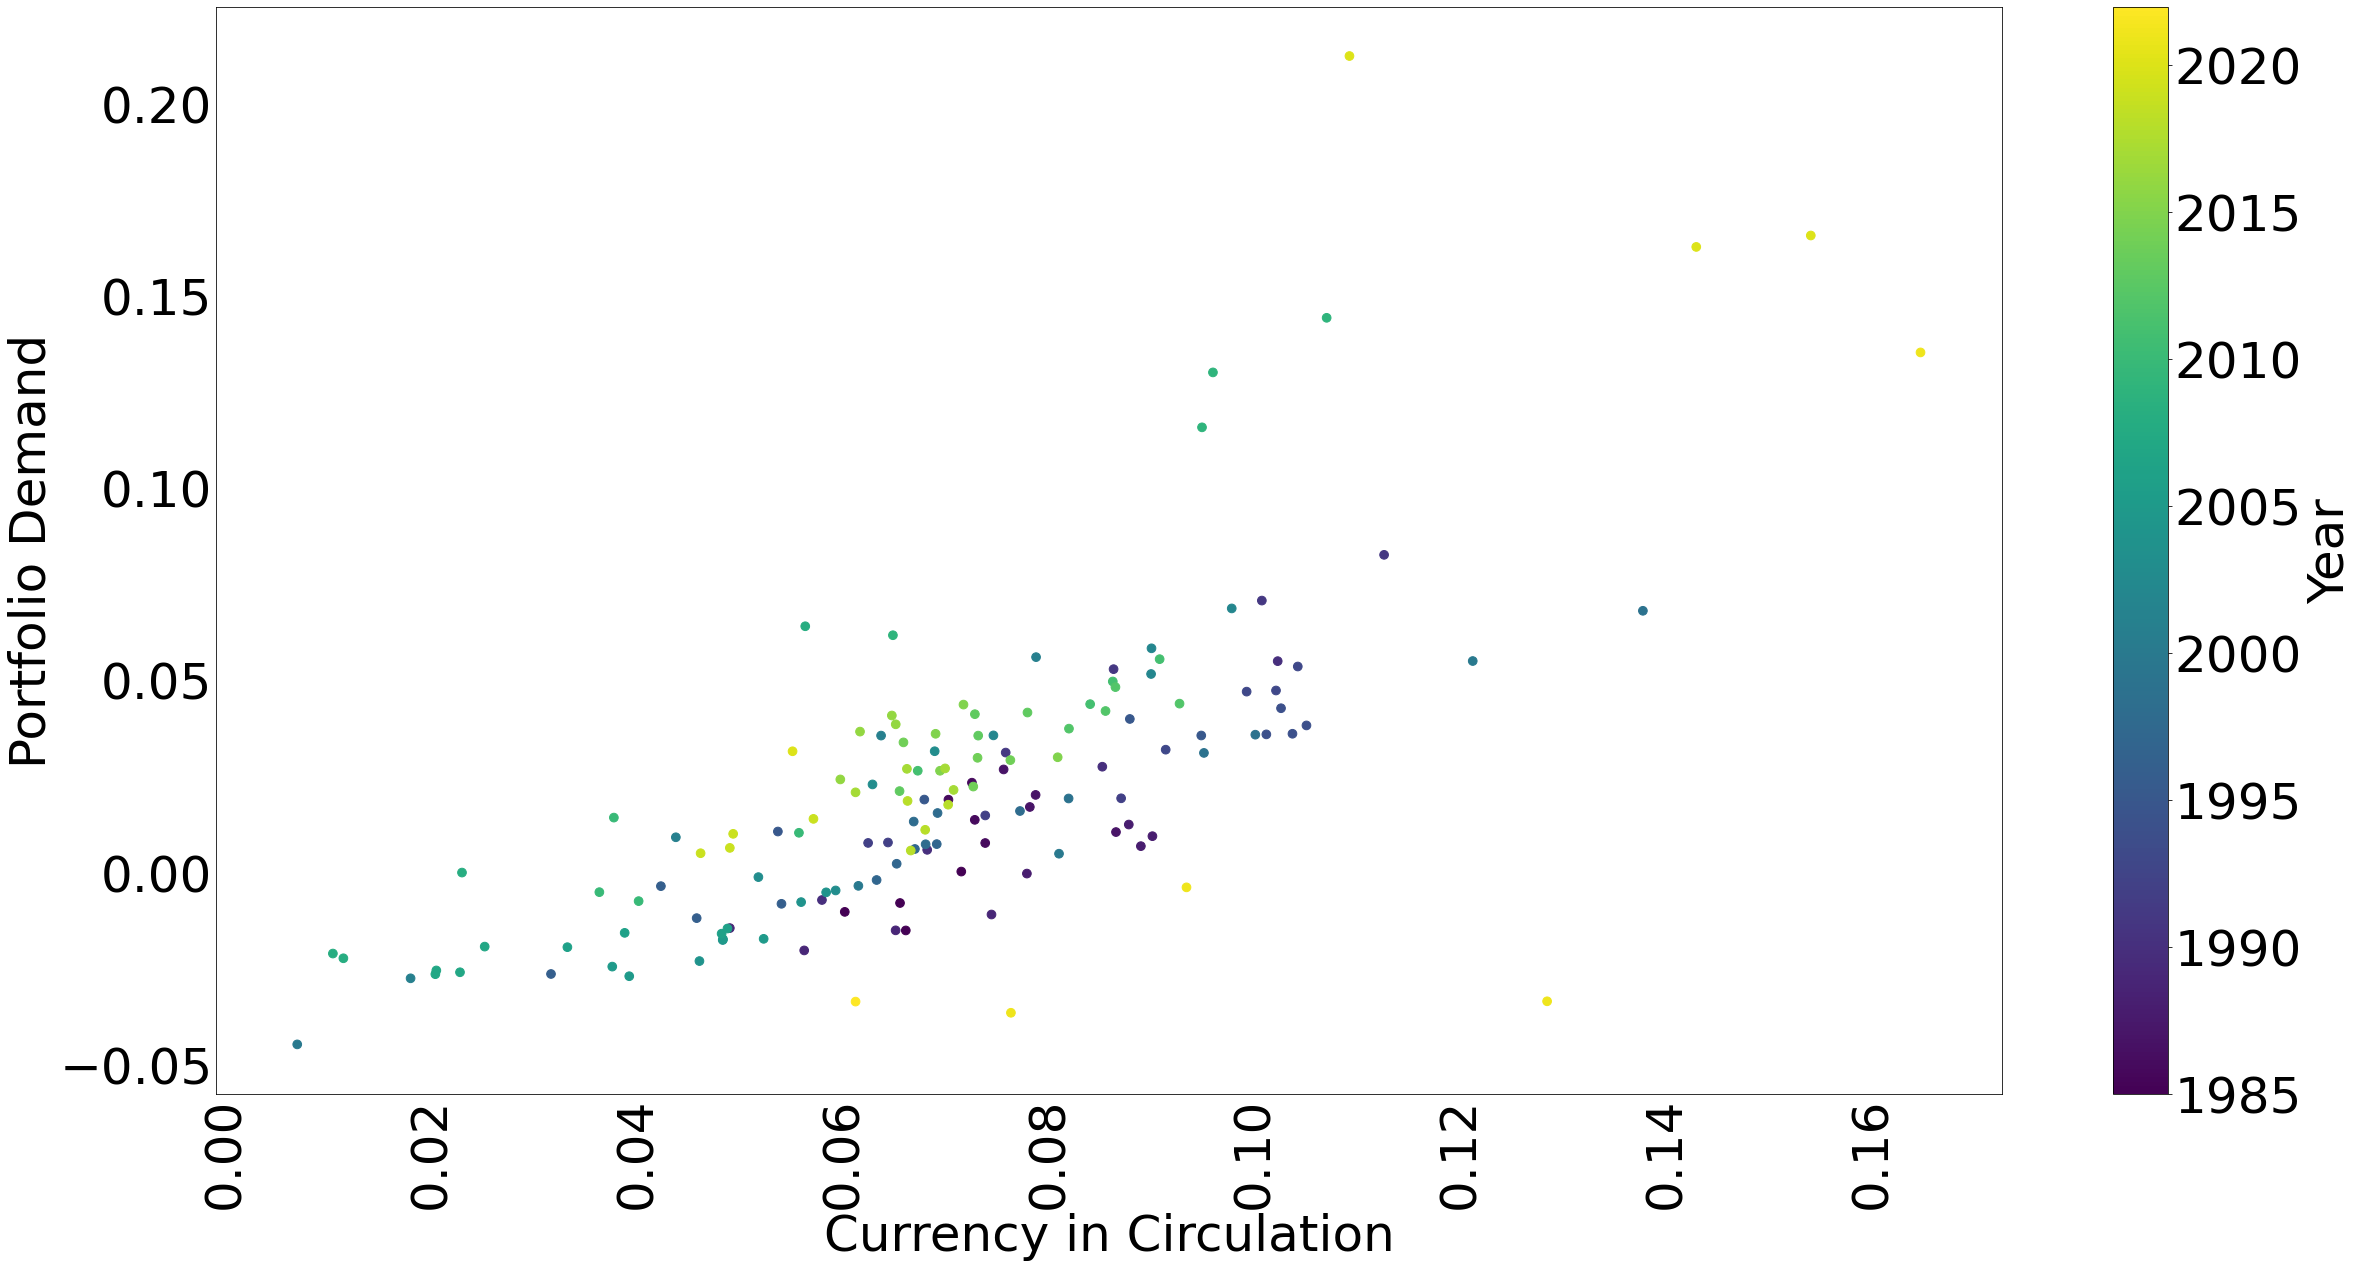

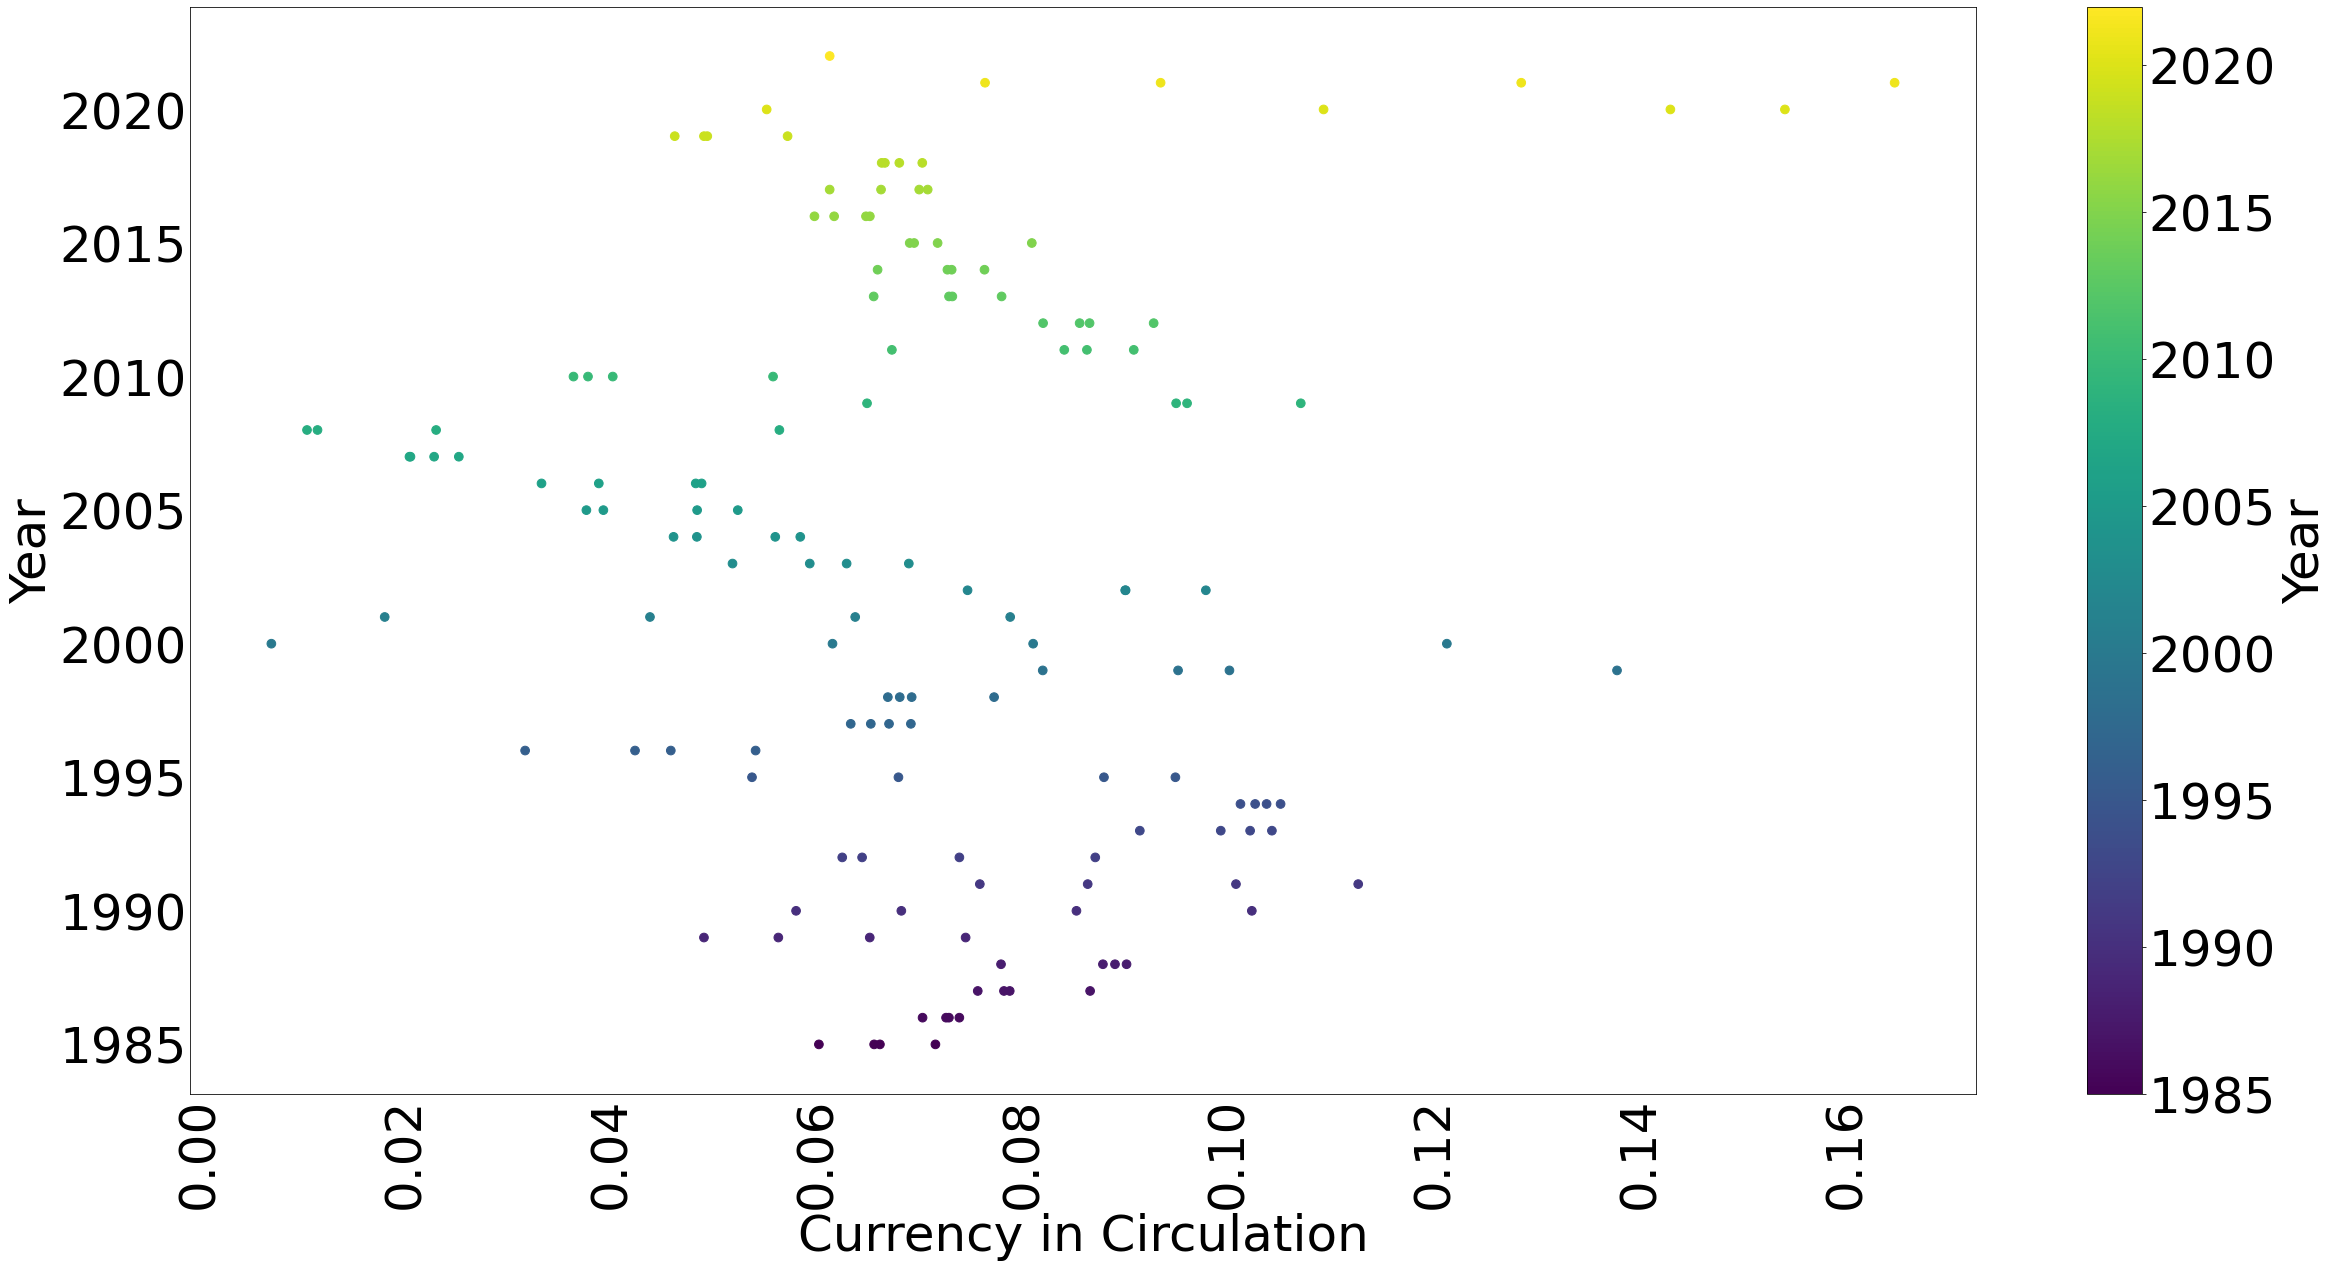

In [9]:
from datlib.plots import *
plt.rcParams.update({"font.size":50})
plot_vars = ["Real Currency in Circulation", "Real GDP", "Portfolio Demand", "Currency in Circulation"]
# plot the year-over-year pct_change of each variable
plot_data = data[plot_vars].pct_change(4)
plot_scatter(plot_data)

C:\Users\JLCat\GithubRepositories\Macroeconomics-Growth-and-Monetary-Equilibrium\Data Homework Assignments\datlib\plots.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(x,2) for x in vals])


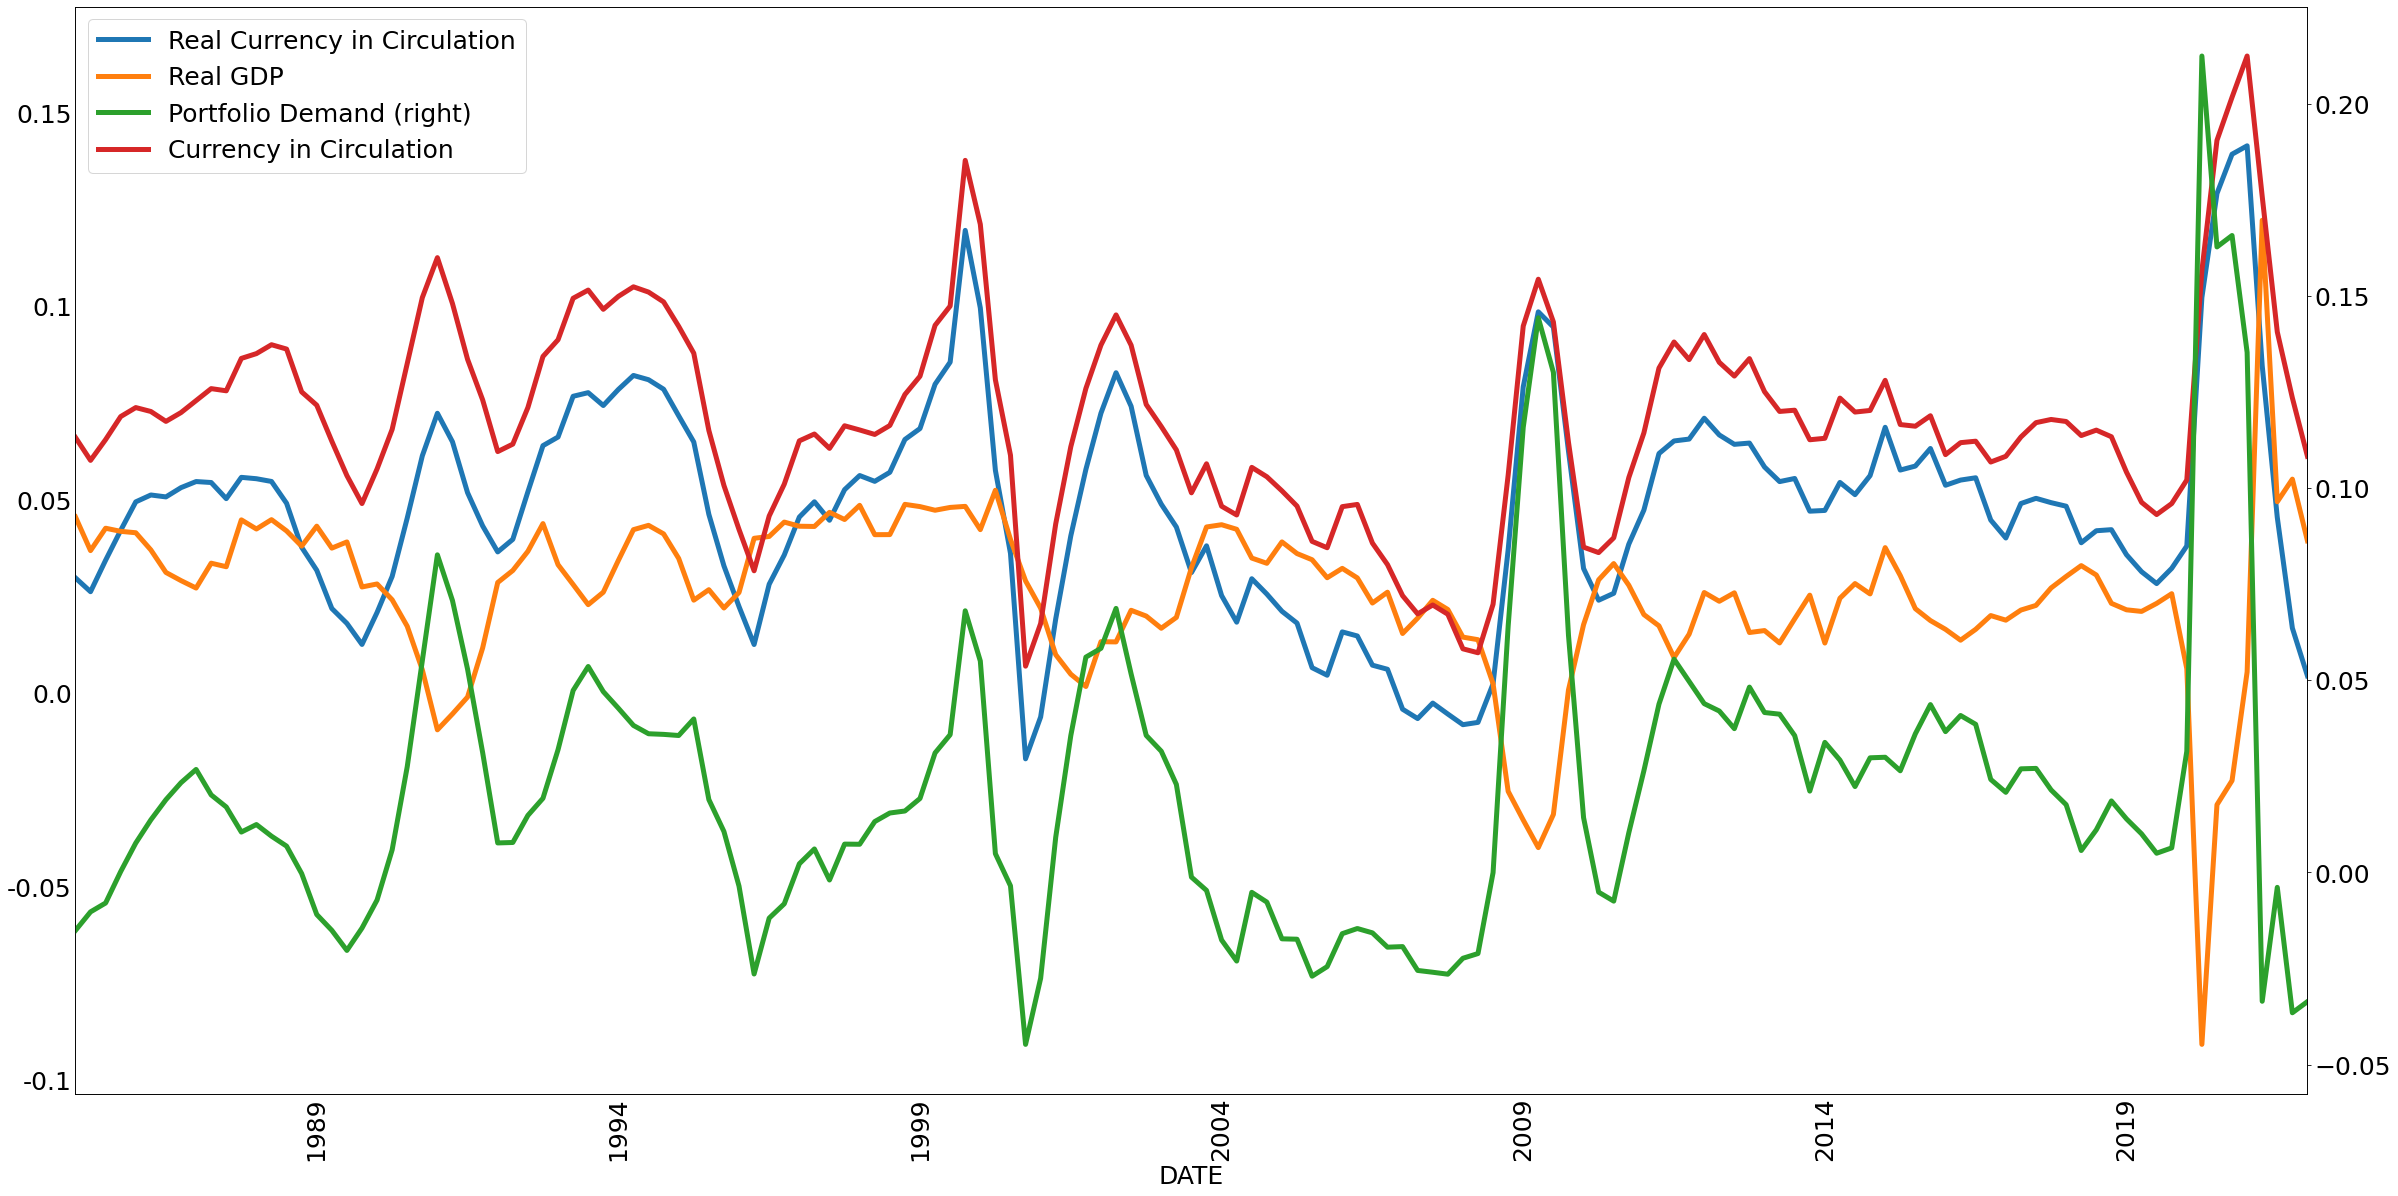

In [11]:
plt.rcParams.update({"font.size":25})
plot_lines(plot_data, linewidth = 5, secondary_y = "Portfolio Demand")